# Introduction

Google Trends gives us an estimate of search volume. Let's explore if search popularity relates to other kinds of data. Perhaps there are patterns in Google's search volume and the price of Bitcoin or a hot stock like Tesla. Perhaps search volume for the term "Unemployment Benefits" can tell us something about the actual unemployment rate?

Data Sources: <br>
<ul>
<li> <a href="https://fred.stlouisfed.org/series/UNRATE/">Unemployment Rate from FRED</a></li>
<li> <a href="https://trends.google.com/trends/explore">Google Trends</a> </li>  
<li> <a href="https://finance.yahoo.com/quote/TSLA/history?p=TSLA">Yahoo Finance for Tesla Stock Price</a> </li>    
<li> <a href="https://finance.yahoo.com/quote/BTC-USD/history?p=BTC-USD">Yahoo Finance for Bitcoin Stock Price</a> </li>
</ul>

# Import Statements

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

pd.options.display.float_format = '${:,.2f}'.format


# Read the Data

Download and add the .csv files to the same folder as your notebook.

In [ ]:
df_tesla = pd.read_csv('TESLA Search Trend vs Price.csv')

df_btc_search = pd.read_csv('Bitcoin Search Trend.csv')

df_unemployment = pd.read_csv('UE Benefits Search vs UE Rate 2004-19.csv')

In [ ]:
df_btc_price = pd.read_csv('Daily Bitcoin Price.csv')

# Data Exploration

### Tesla

**Challenge**: <br>
<ul>
<li>What are the shapes of the dataframes? </li>
<li>How many rows and columns? </li>
<li>What are the column names? </li>
<li>Complete the f-string to show the largest/smallest number in the search data column</li>
<li>Try the <code>.describe()</code> function to see some useful descriptive statistics</li>
<li>What is the periodicity of the time series data (daily, weekly, monthly)? </li>
<li>What does a value of 100 in the Google Trend search popularity actually mean?</li>
</ul>

In [ ]:
df_tesla.shape
df_tesla.columns
df_tesla.head()

,MONTH,TSLA_WEB_SEARCH,TSLA_USD_CLOSE
0,2010-06-01,3,$4.77
1,2010-07-01,3,$3.99
2,2010-08-01,2,$3.90
3,2010-09-01,2,$4.08
4,2010-10-01,2,$4.37


In [ ]:
df_tesla.describe()

,TSLA_WEB_SEARCH,TSLA_USD_CLOSE
count,$124.00,$124.00
mean,$8.73,$50.96
std,$5.87,$65.91
min,$2.00,$3.90
25%,$3.75,$7.35
50%,$8.00,$44.65
75%,$12.00,$58.99
max,$31.00,$498.32


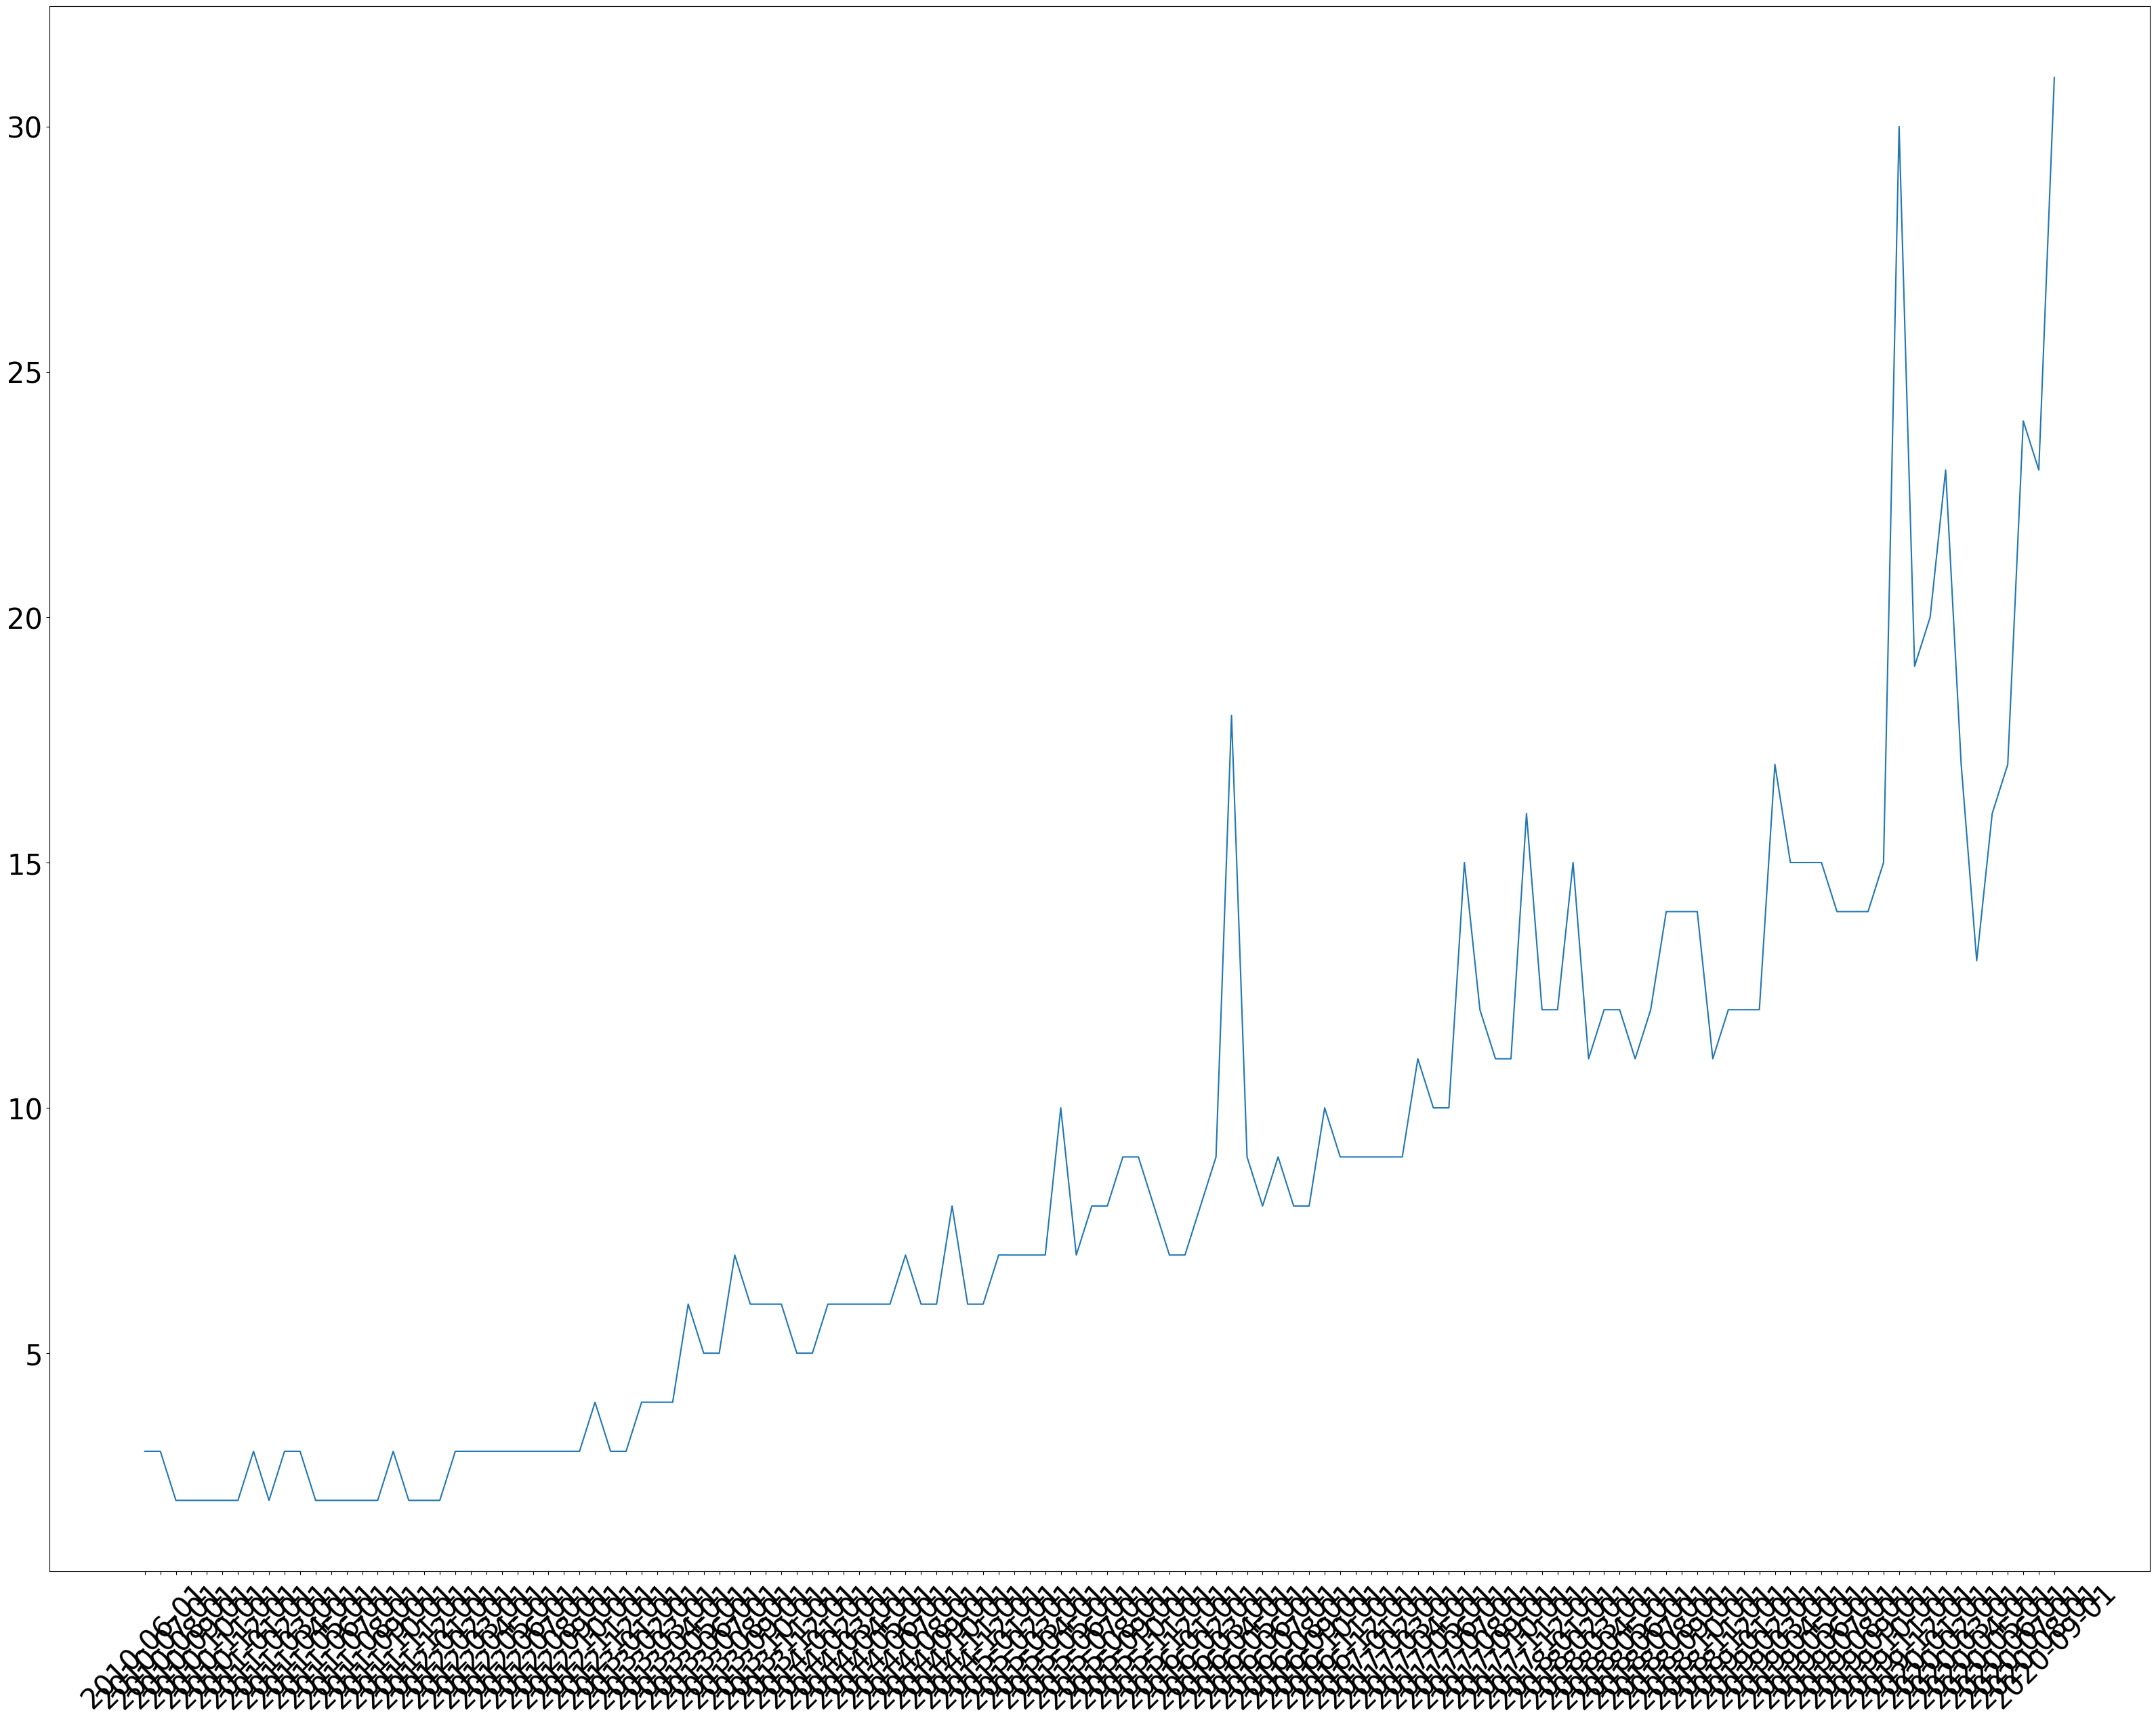

In [ ]:
plt.figure(figsize=(40,30))
plt.xticks(size=30, rotation=45)
plt.yticks(size=30)
plt.plot(df_tesla['MONTH'], df_tesla['TSLA_WEB_SEARCH'])

In [ ]:
print(f'Largest value for Tesla in Web Search: {df_tesla["TSLA_WEB_SEARCH"].max()}')
print(f'Smallest value for Tesla in Web Search: {df_tesla["TSLA_WEB_SEARCH"].min()}')

Largest value for Tesla in Web Search: 31
Smallest value for Tesla in Web Search: 2


### Unemployment Data

In [ ]:
print(df_unemployment.shape)
print(df_unemployment.columns)
print(df_unemployment.head())
print(df_unemployment.describe())

(181, 3)
Index(['MONTH', 'UE_BENEFITS_WEB_SEARCH', 'UNRATE'], dtype='object')
     MONTH  UE_BENEFITS_WEB_SEARCH  UNRATE
0  2004-01                      34   $5.70
1  2004-02                      33   $5.60
2  2004-03                      25   $5.80
3  2004-04                      29   $5.60
4  2004-05                      23   $5.60
       UE_BENEFITS_WEB_SEARCH  UNRATE
count                 $181.00 $181.00
mean                   $35.11   $6.22
std                    $20.48   $1.89
min                    $14.00   $3.70
25%                    $21.00   $4.70
50%                    $26.00   $5.40
75%                    $45.00   $7.80
max                   $100.00  $10.00


In [ ]:
print('Largest value for "Unemployemnt Benefits" '
      f'in Web Search: {df_unemployment["UE_BENEFITS_WEB_SEARCH"].max()}')

Largest value for "Unemployemnt Benefits" in Web Search: 100


### Bitcoin

In [ ]:
print(df_btc_search.shape)
print(df_btc_search.columns)
print(df_btc_search.head())
print(df_btc_search.describe())

(73, 2)
Index(['MONTH', 'BTC_NEWS_SEARCH'], dtype='object')
     MONTH  BTC_NEWS_SEARCH
0  2014-09                5
1  2014-10                4
2  2014-11                4
3  2014-12                4
4  2015-01                5
       BTC_NEWS_SEARCH
count           $73.00
mean            $15.01
std             $15.15
min              $3.00
25%              $5.00
50%             $14.00
75%             $18.00
max            $100.00


In [ ]:
print(df_btc_price.shape)
print(df_btc_price.columns)
print(df_btc_price.head())
print(df_btc_price.describe())

(2204, 3)
Index(['DATE', 'CLOSE', 'VOLUME'], dtype='object')
         DATE   CLOSE         VOLUME
0  2014-09-17 $457.33 $21,056,800.00
1  2014-09-18 $424.44 $34,483,200.00
2  2014-09-19 $394.80 $37,919,700.00
3  2014-09-20 $408.90 $36,863,600.00
4  2014-09-21 $398.82 $26,580,100.00
           CLOSE             VOLUME
count  $2,203.00          $2,203.00
mean   $4,429.42  $8,043,622,390.14
std    $4,148.15 $11,765,285,602.39
min      $178.10      $5,914,570.00
25%      $433.63     $60,299,150.00
50%    $3,637.52  $2,018,889,984.00
75%    $7,997.37 $13,224,781,071.00
max   $19,497.40 $74,156,772,074.00


In [ ]:
print(f'largest BTC News Search: {df_btc_search["BTC_NEWS_SEARCH"].max()}')

largest BTC News Search: 100


# Data Cleaning

### Check for Missing Values

**Challenge**: Are there any missing values in any of the dataframes? If so, which row/rows have missing values? How many missing values are there?

In [ ]:
print(f'Missing values for Tesla?: {df_tesla.isna().values.any()}')
print(f'Missing values for U/E?: {df_unemployment.isna().values.any()}')
print(f'Missing values for BTC Search?: {df_btc_search.isna().values.any()}')
print(f'Missing values for BTC Price?: {df_btc_price.isna().values.any()}')



Missing values for Tesla?: False
Missing values for U/E?: False
Missing values for BTC Search?: False
Missing values for BTC Price?: True


In [ ]:
#important axis=1 - two different formats of values with axis parameter
print(f'Missing values for BTC price?: {df_btc_price.loc[df_btc_price.isna().any(axis=1)]}')

Missing values for BTC price?:             DATE  CLOSE  VOLUME
2148  2020-08-04    NaN     NaN


In [ ]:
print(f'Number of missing values: {df_btc_price.isna().any().sum()}')

Number of missing values: 2


**Challenge**: Remove any missing values that you found.

In [ ]:

# axis = 0 doesn't work for location search
df_btc_price.dropna(inplace=True)
df_btc_price.head()

,DATE,CLOSE,VOLUME
0,2014-09-17,$457.33,"$21,056,800.00"
1,2014-09-18,$424.44,"$34,483,200.00"
2,2014-09-19,$394.80,"$37,919,700.00"
3,2014-09-20,$408.90,"$36,863,600.00"
4,2014-09-21,$398.82,"$26,580,100.00"


### Convert Strings to DateTime Objects

**Challenge**: Check the data type of the entries in the DataFrame MONTH or DATE columns. Convert any strings in to Datetime objects. Do this for all 4 DataFrames. Double check if your type conversion was successful.

In [ ]:
# df_tesla.rename(columns={'MONTH': 'DATE'}, inplace=True)
df_tesla['MONTH'] = pd.to_datetime(df_tesla['MONTH'], format='%Y-%m-%d')
print(df_tesla.head())
print(type(df_tesla['MONTH'][0]))

       MONTH  TSLA_WEB_SEARCH  TSLA_USD_CLOSE
0 2010-06-01                3           $4.77
1 2010-07-01                3           $3.99
2 2010-08-01                2           $3.90
3 2010-09-01                2           $4.08
4 2010-10-01                2           $4.37
<class 'pandas._libs.tslibs.timestamps.Timestamp'>


In [ ]:
print(type(df_unemployment['MONTH'][0]))
df_unemployment['MONTH'] = pd.to_datetime(df_unemployment['MONTH'], format='ISO8601')
print(type(df_unemployment['MONTH'][0]))

<class 'str'>
<class 'pandas._libs.tslibs.timestamps.Timestamp'>


In [ ]:
print(type(df_btc_search['MONTH'][0]))
df_btc_search['MONTH'] = pd.to_datetime(df_btc_search['MONTH'], format='ISO8601')
print(type(df_btc_search['MONTH'][0]))

<class 'str'>
<class 'pandas._libs.tslibs.timestamps.Timestamp'>


In [ ]:

print(type(df_btc_price['DATE'][0]))
df_btc_price['DATE'] = pd.to_datetime(df_btc_price['DATE'], format='ISO8601')
df_btc_price.head()
print(type(df_btc_price['DATE'][0]))

<class 'str'>
<class 'pandas._libs.tslibs.timestamps.Timestamp'>


### Converting from Daily to Monthly Data

[Pandas .resample() documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.resample.html) <br>

In [ ]:
# converting index to datetime object
# df_btc_price.set_index('DATE', inplace=True)
print(df_btc_price.head())
type(df_btc_price.index[0])



        DATE   CLOSE         VOLUME
0 2014-09-17 $457.33 $21,056,800.00
1 2014-09-18 $424.44 $34,483,200.00
2 2014-09-19 $394.80 $37,919,700.00
3 2014-09-20 $408.90 $36,863,600.00
4 2014-09-21 $398.82 $26,580,100.00


numpy.int64

In [ ]:
new_df = df_btc_price.copy()
new_df.rename(columns={'DATE': 'MONTH'}, inplace=True)
new_df.index = new_df['MONTH']
new_df.head()

new_df = new_df.resample('ME').first()
new_df.head()



,MONTH,CLOSE,VOLUME
MONTH,,,
2014-09-30,2014-09-17,$457.33,"$21,056,800.00"
2014-10-31,2014-10-01,$383.61,"$26,229,400.00"
2014-11-30,2014-11-01,$325.75,"$16,677,200.00"
2014-12-31,2014-12-01,$379.24,"$11,763,000.00"
2015-01-31,2015-01-01,$314.25,"$8,036,550.00"


In [ ]:
df_btc_price.index = df_btc_price['DATE']
df_btc_price.rename(columns={'DATE': 'MONTH'}, inplace=True)
df_btc_price = df_btc_price.resample('ME').first()
# df_btc_price.rename(columns={'DATE': 'MONTH'}, inplace=True)
df_btc_price.head()

,MONTH,CLOSE,VOLUME
DATE,,,
2014-09-30,2014-09-17,$457.33,"$21,056,800.00"
2014-10-31,2014-10-01,$383.61,"$26,229,400.00"
2014-11-30,2014-11-01,$325.75,"$16,677,200.00"
2014-12-31,2014-12-01,$379.24,"$11,763,000.00"
2015-01-31,2015-01-01,$314.25,"$8,036,550.00"


In [ ]:
print(df_btc_price.shape)
print(df_btc_search.shape)
print(df_btc_price.head())
print(df_btc_search.head())

(73, 3)
(73, 2)
                MONTH   CLOSE         VOLUME
DATE                                        
2014-09-30 2014-09-17 $457.33 $21,056,800.00
2014-10-31 2014-10-01 $383.61 $26,229,400.00
2014-11-30 2014-11-01 $325.75 $16,677,200.00
2014-12-31 2014-12-01 $379.24 $11,763,000.00
2015-01-31 2015-01-01 $314.25  $8,036,550.00
       MONTH  BTC_NEWS_SEARCH
0 2014-09-01                5
1 2014-10-01                4
2 2014-11-01                4
3 2014-12-01                4
4 2015-01-01                5


In [ ]:
merge_df = pd.merge(df_btc_price, df_btc_search, on='MONTH')
merge_df.head()

,MONTH,CLOSE,VOLUME,BTC_NEWS_SEARCH
0,2014-10-01,$383.61,"$26,229,400.00",4
1,2014-11-01,$325.75,"$16,677,200.00",4
2,2014-12-01,$379.24,"$11,763,000.00",4
3,2015-01-01,$314.25,"$8,036,550.00",5
4,2015-02-01,$226.97,"$29,128,500.00",4


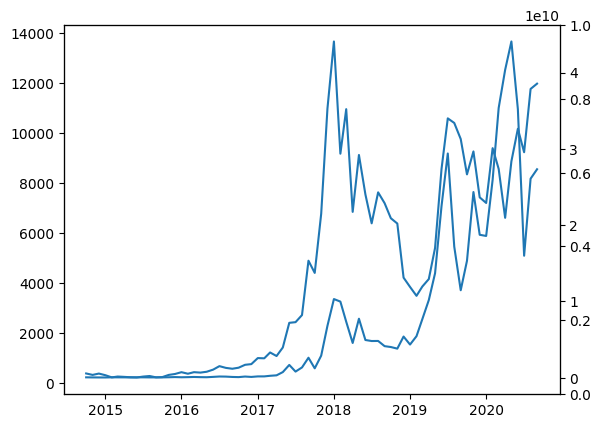

In [ ]:
ax1 = plt.gca()
ax2 = ax1.twinx()
ax3 = ax1.twinx()


# ax1.plot(merge_df['MONTH'], merge_df['BTC_NEWS_SEARCH'])
ax1.plot(merge_df['MONTH'], merge_df['CLOSE'])
ax2.plot(merge_df['MONTH'], merge_df['VOLUME'])

In [ ]:
merge_df.BTC_NEWS_SEARCH.idxmax()
merge_df.loc[merge_df.BTC_NEWS_SEARCH.idxmax()]

,38
MONTH,2017-12-01 00:00:00
CLOSE,"$10,975.60"
VOLUME,"$6,783,119,872.00"
BTC_NEWS_SEARCH,100


# Data Visualisation

                               MONTH  TSLA_WEB_SEARCH  TSLA_USD_CLOSE
count                            124          $124.00         $124.00
mean   2015-07-17 05:48:23.225806336            $8.73          $50.96
min              2010-06-01 00:00:00            $2.00           $3.90
25%              2012-12-24 06:00:00            $3.75           $7.35
50%              2015-07-16 12:00:00            $8.00          $44.65
75%              2018-02-08 00:00:00           $12.00          $58.99
max              2020-09-01 00:00:00           $31.00         $498.32
std                              NaN            $5.87          $65.91


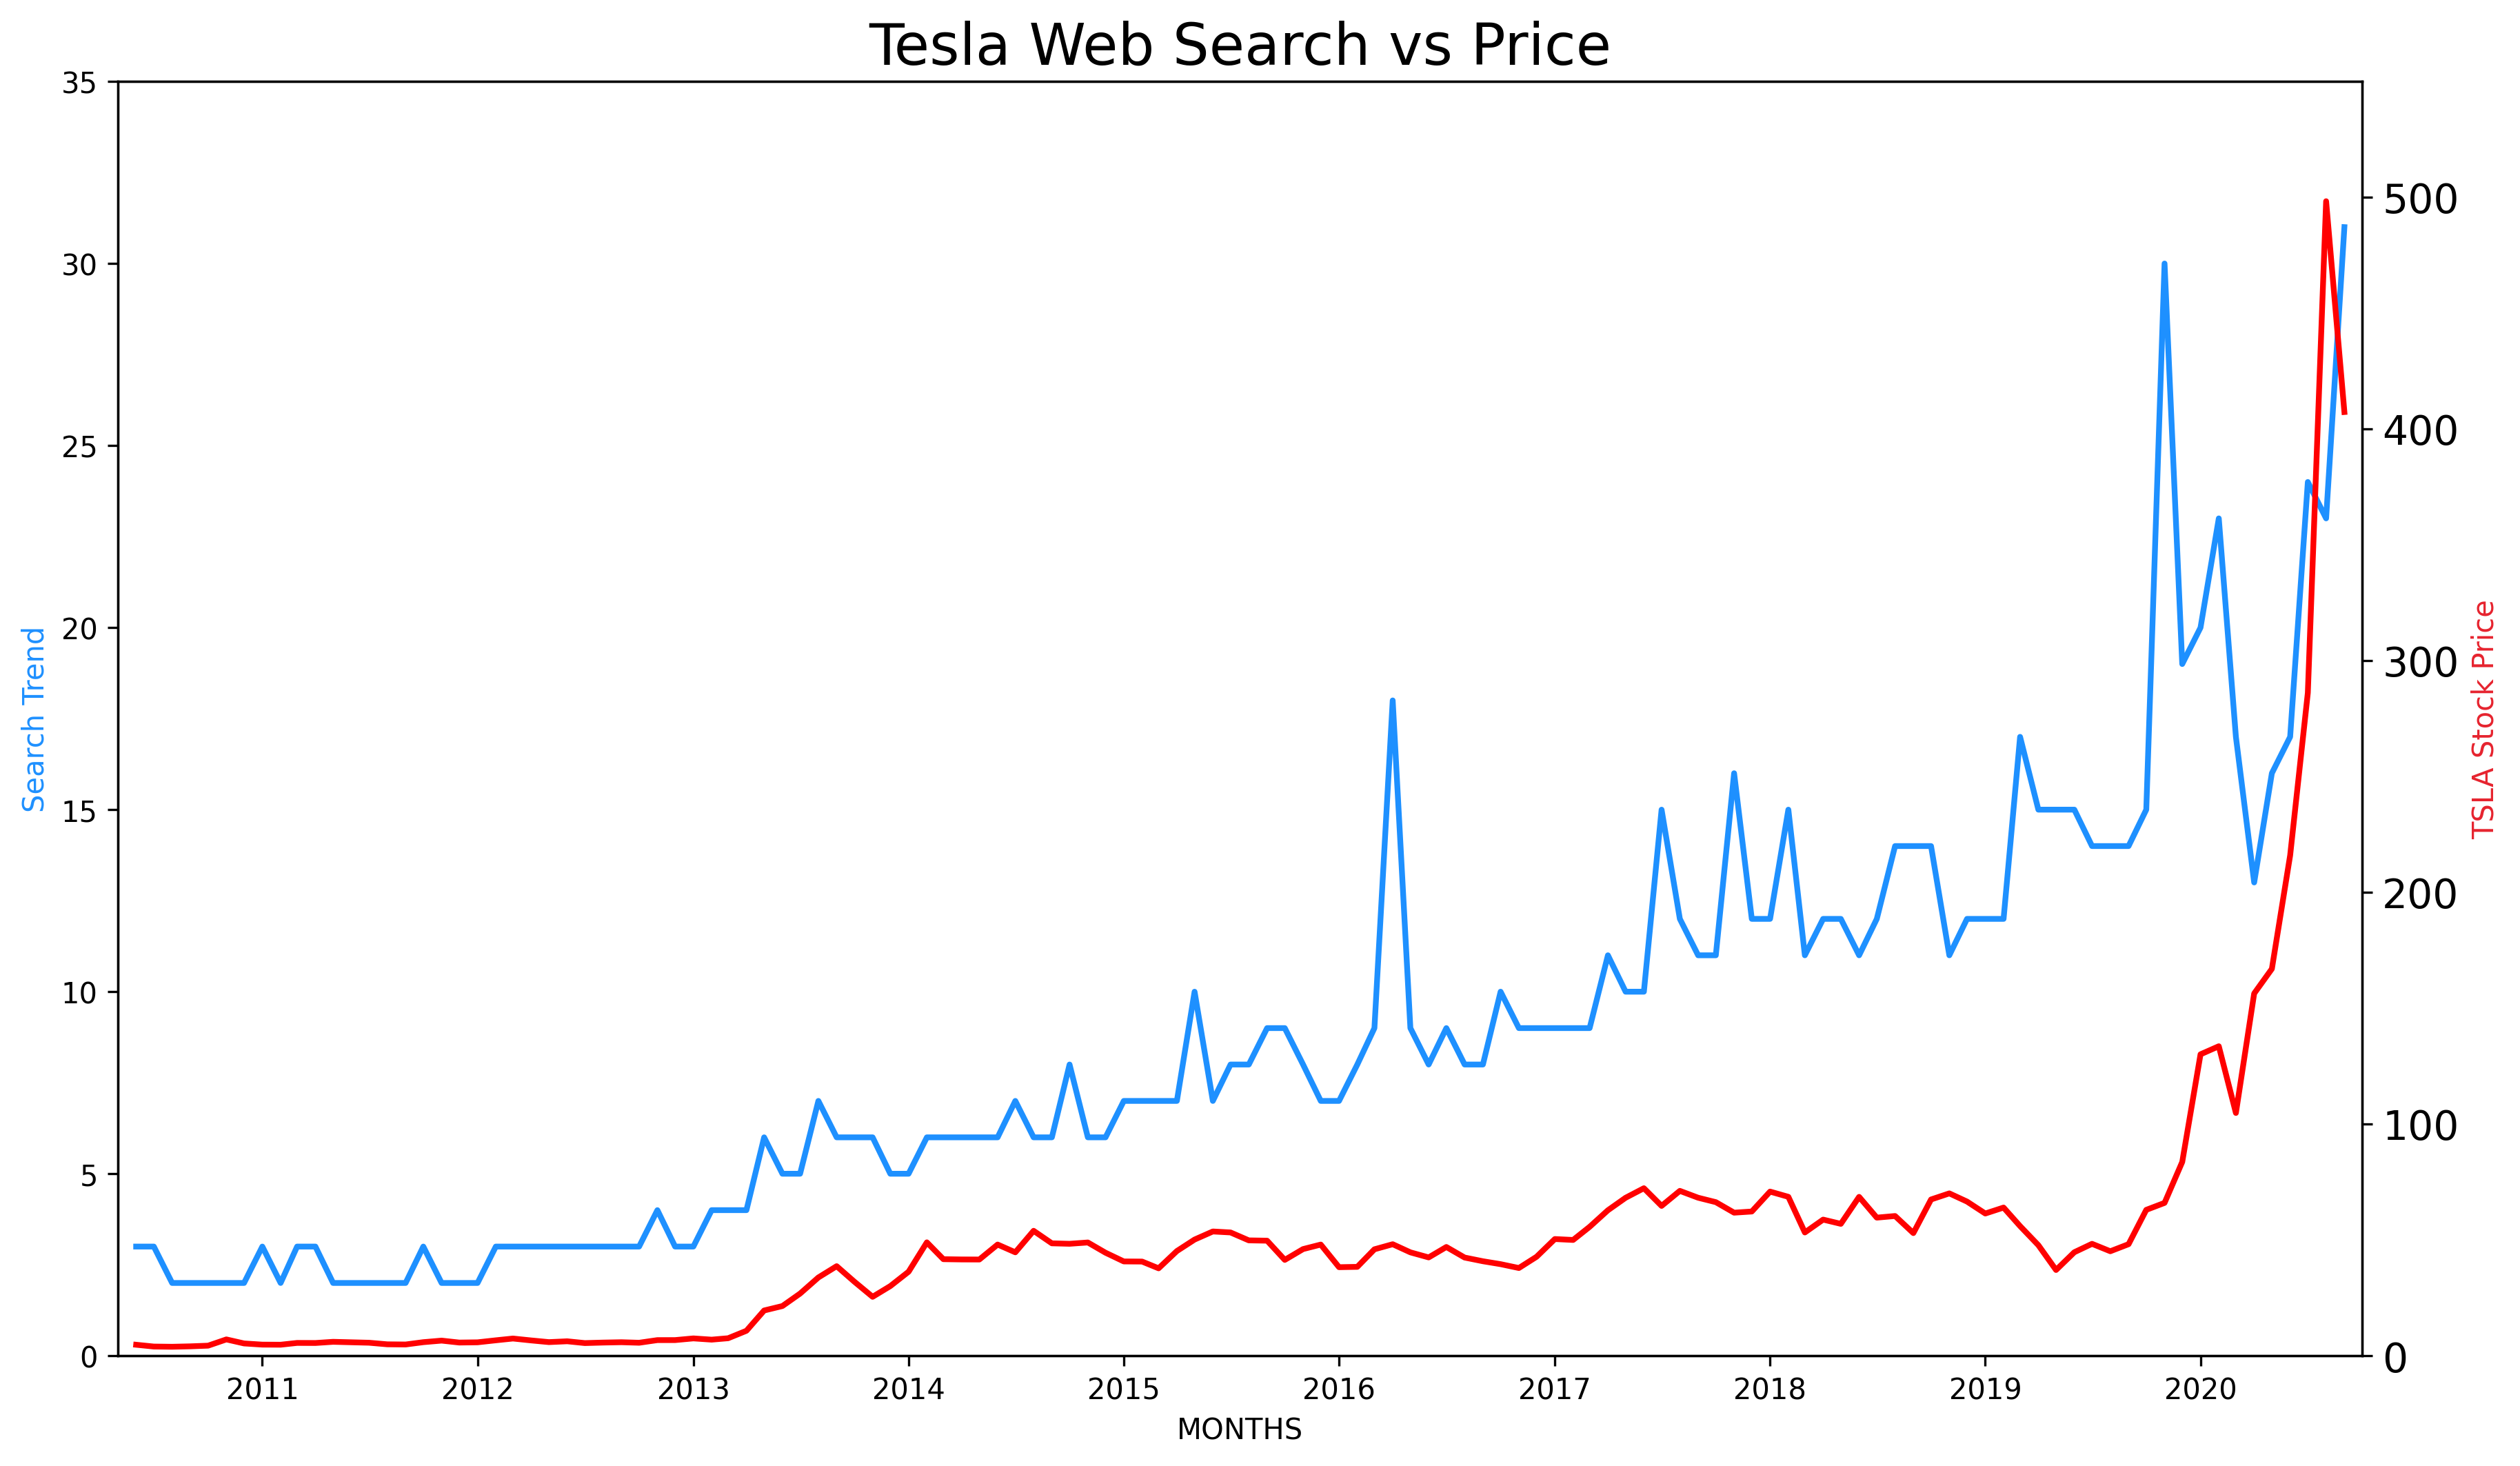

In [ ]:
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

print(df_tesla.describe())

plt.figure(figsize=(14, 8), dpi=300)
plt.title('Tesla Web Search vs Price', fontsize=20)
ax1 = plt.gca()
ax2 = ax1.twinx()

ax1.set_xlabel("MONTHS")
plt.xticks(fontsize=14, rotation=45)
plt.yticks(size=14)

ax1.set_ylabel('Search Trend', color='dodgerblue') # can use a HEX code
ax2.set_ylabel('TSLA Stock Price', color='#E6232E') # or a named colour


ax1.set_ylim([0, 35])
ax2.set_ylim([0, 550])
# ax1.set_xlim([df_tesla.MONTH.min(), df_tesla.MONTH.max()])
ax1.set_xlim([pd.to_datetime('2010-05-01'), pd.to_datetime('2020-10-01')])

# ax1.set_ylim(bottom=2)
ax1.plot(df_tesla['MONTH'], df_tesla['TSLA_WEB_SEARCH'], linewidth=2, color='dodgerblue')
ax2.plot(df_tesla['MONTH'], df_tesla['TSLA_USD_CLOSE'], color='red', linewidth=2)

# plt.legend()
plt.show()

### Notebook Formatting & Style Helpers

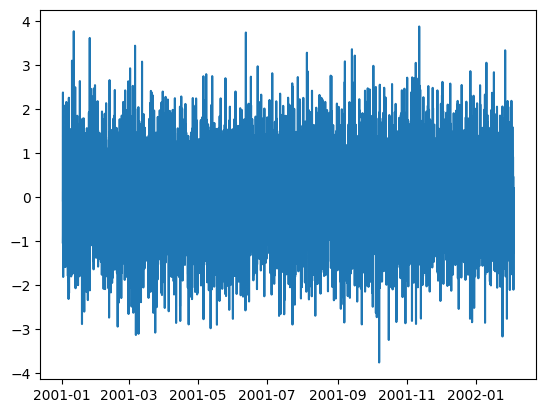

In [ ]:
import numpy as np

times = np.arange(np.datetime64('2001-01-02'),
                  np.datetime64('2002-02-03'), np.timedelta64(75, 'm'))
y = np.random.randn(len(times))

fig, ax = plt.subplots()
ax.plot(times, y)

                               MONTH  TSLA_WEB_SEARCH  TSLA_USD_CLOSE
count                            124          $124.00         $124.00
mean   2015-07-17 05:48:23.225806336            $8.73          $50.96
min              2010-06-01 00:00:00            $2.00           $3.90
25%              2012-12-24 06:00:00            $3.75           $7.35
50%              2015-07-16 12:00:00            $8.00          $44.65
75%              2018-02-08 00:00:00           $12.00          $58.99
max              2020-09-01 00:00:00           $31.00         $498.32
std                              NaN            $5.87          $65.91


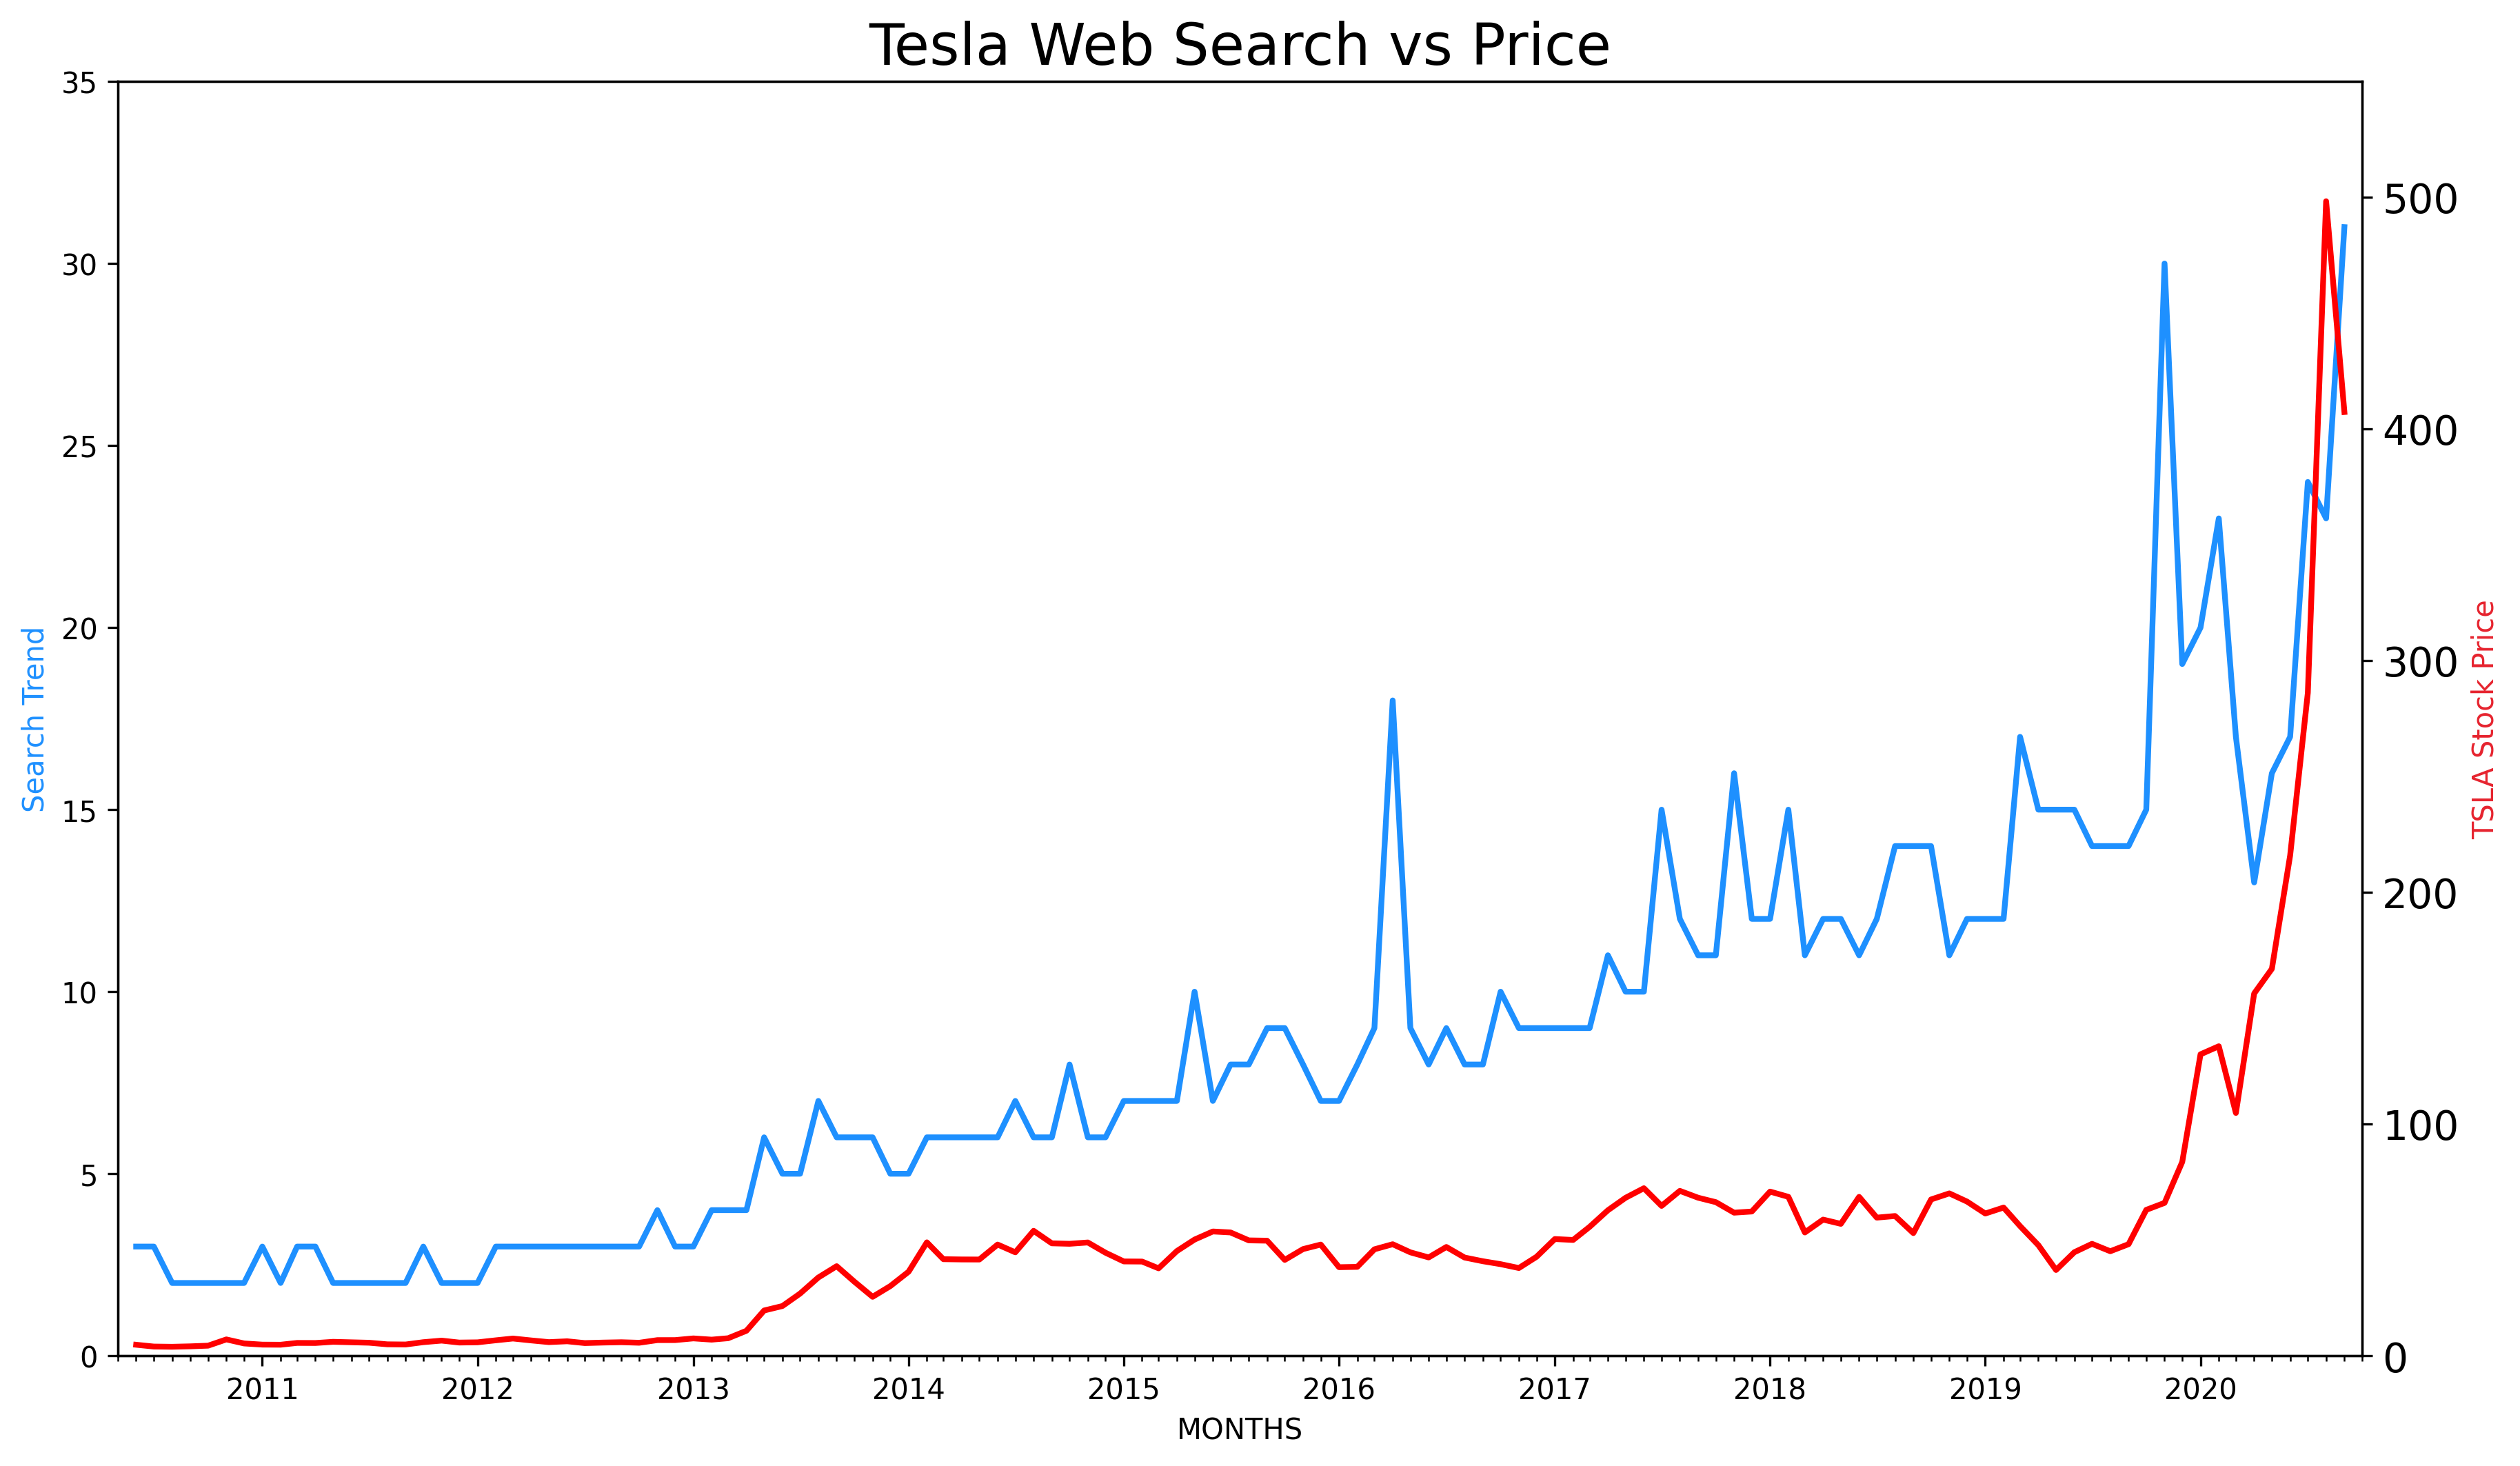

In [ ]:
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

print(df_tesla.describe())

plt.figure(figsize=(14, 8), dpi=300)
plt.title('Tesla Web Search vs Price', fontsize=20)
ax1 = plt.gca()
ax2 = ax1.twinx()

# Create locators for ticks on the time axis
import matplotlib.dates as mdates

year_locator = mdates.YearLocator()
month_locator = mdates.MonthLocator()

# Create a formatter to use
date_formatter = mdates.DateFormatter('%Y')

# ticks
ax1.xaxis.set_major_locator(year_locator)
ax1.xaxis.set_major_formatter(date_formatter)
ax1.xaxis.set_minor_locator(month_locator)

ax1.set_xlabel("MONTHS")
plt.xticks(fontsize=14, rotation=45)
plt.yticks(size=14)

ax1.set_ylabel('Search Trend', color='dodgerblue') # can use a HEX code
ax2.set_ylabel('TSLA Stock Price', color='#E6232E') # or a named colour


ax1.set_ylim([0, 35])
ax2.set_ylim([0, 550])
# ax1.set_xlim([df_tesla.MONTH.min(), df_tesla.MONTH.max()])
ax1.set_xlim([pd.to_datetime('2010-05-01'), pd.to_datetime('2020-10-01')])

# ax1.set_ylim(bottom=2)
ax1.plot(df_tesla['MONTH'], df_tesla['TSLA_WEB_SEARCH'], linewidth=2, color='dodgerblue')
ax2.plot(df_tesla['MONTH'], df_tesla['TSLA_USD_CLOSE'], color='red', linewidth=2)

# plt.legend()
plt.show()


In [ ]:
# Register date converters to avoid warning messages

### Tesla Stock Price v.s. Search Volume

**Challenge:** Plot the Tesla stock price against the Tesla search volume using a line chart and two different axes. Label one axis 'TSLA Stock Price' and the other 'Search Trend'.

**Challenge**: Add colours to style the chart. This will help differentiate the two lines and the axis labels. Try using one of the blue [colour names](https://matplotlib.org/3.1.1/gallery/color/named_colors.html) for the search volume and a HEX code for a red colour for the stock price.
<br>
<br>
Hint: you can colour both the [axis labels](https://matplotlib.org/3.3.2/api/text_api.html#matplotlib.text.Text) and the [lines](https://matplotlib.org/3.2.1/api/_as_gen/matplotlib.lines.Line2D.html#matplotlib.lines.Line2D) on the chart using keyword arguments (kwargs).  

**Challenge**: Make the chart larger and easier to read.
1. Increase the figure size (e.g., to 14 by 8).
2. Increase the font sizes for the labels and the ticks on the x-axis to 14.
3. Rotate the text on the x-axis by 45 degrees.
4. Make the lines on the chart thicker.
5. Add a title that reads 'Tesla Web Search vs Price'
6. Keep the chart looking sharp by changing the dots-per-inch or [DPI value](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.figure.html).
7. Set minimum and maximum values for the y and x axis. Hint: check out methods like [set_xlim()](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.axes.Axes.set_xlim.html).
8. Finally use [plt.show()](https://matplotlib.org/3.2.1/api/_as_gen/matplotlib.pyplot.show.html) to display the chart below the cell instead of relying on the automatic notebook output.

How to add tick formatting for dates on the x-axis.

### Bitcoin (BTC) Price v.s. Search Volume

**Challenge**: Create the same chart for the Bitcoin Prices vs. Search volumes. <br>
1. Modify the chart title to read 'Bitcoin News Search vs Resampled Price' <br>
2. Change the y-axis label to 'BTC Price' <br>
3. Change the y- and x-axis limits to improve the appearance <br>
4. Investigate the [linestyles](https://matplotlib.org/3.2.1/api/_as_gen/matplotlib.pyplot.plot.html ) to make the BTC price a dashed line <br>
5. Investigate the [marker types](https://matplotlib.org/3.2.1/api/markers_api.html) to make the search datapoints little circles <br>
6. Were big increases in searches for Bitcoin accompanied by big increases in the price?

                               MONTH  BTC_NEWS_SEARCH
count                             73           $73.00
mean   2017-08-31 09:32:03.287671296           $15.01
min              2014-09-01 00:00:00            $3.00
25%              2016-03-01 00:00:00            $5.00
50%              2017-09-01 00:00:00           $14.00
75%              2019-03-01 00:00:00           $18.00
max              2020-09-01 00:00:00          $100.00
std                              NaN           $15.15


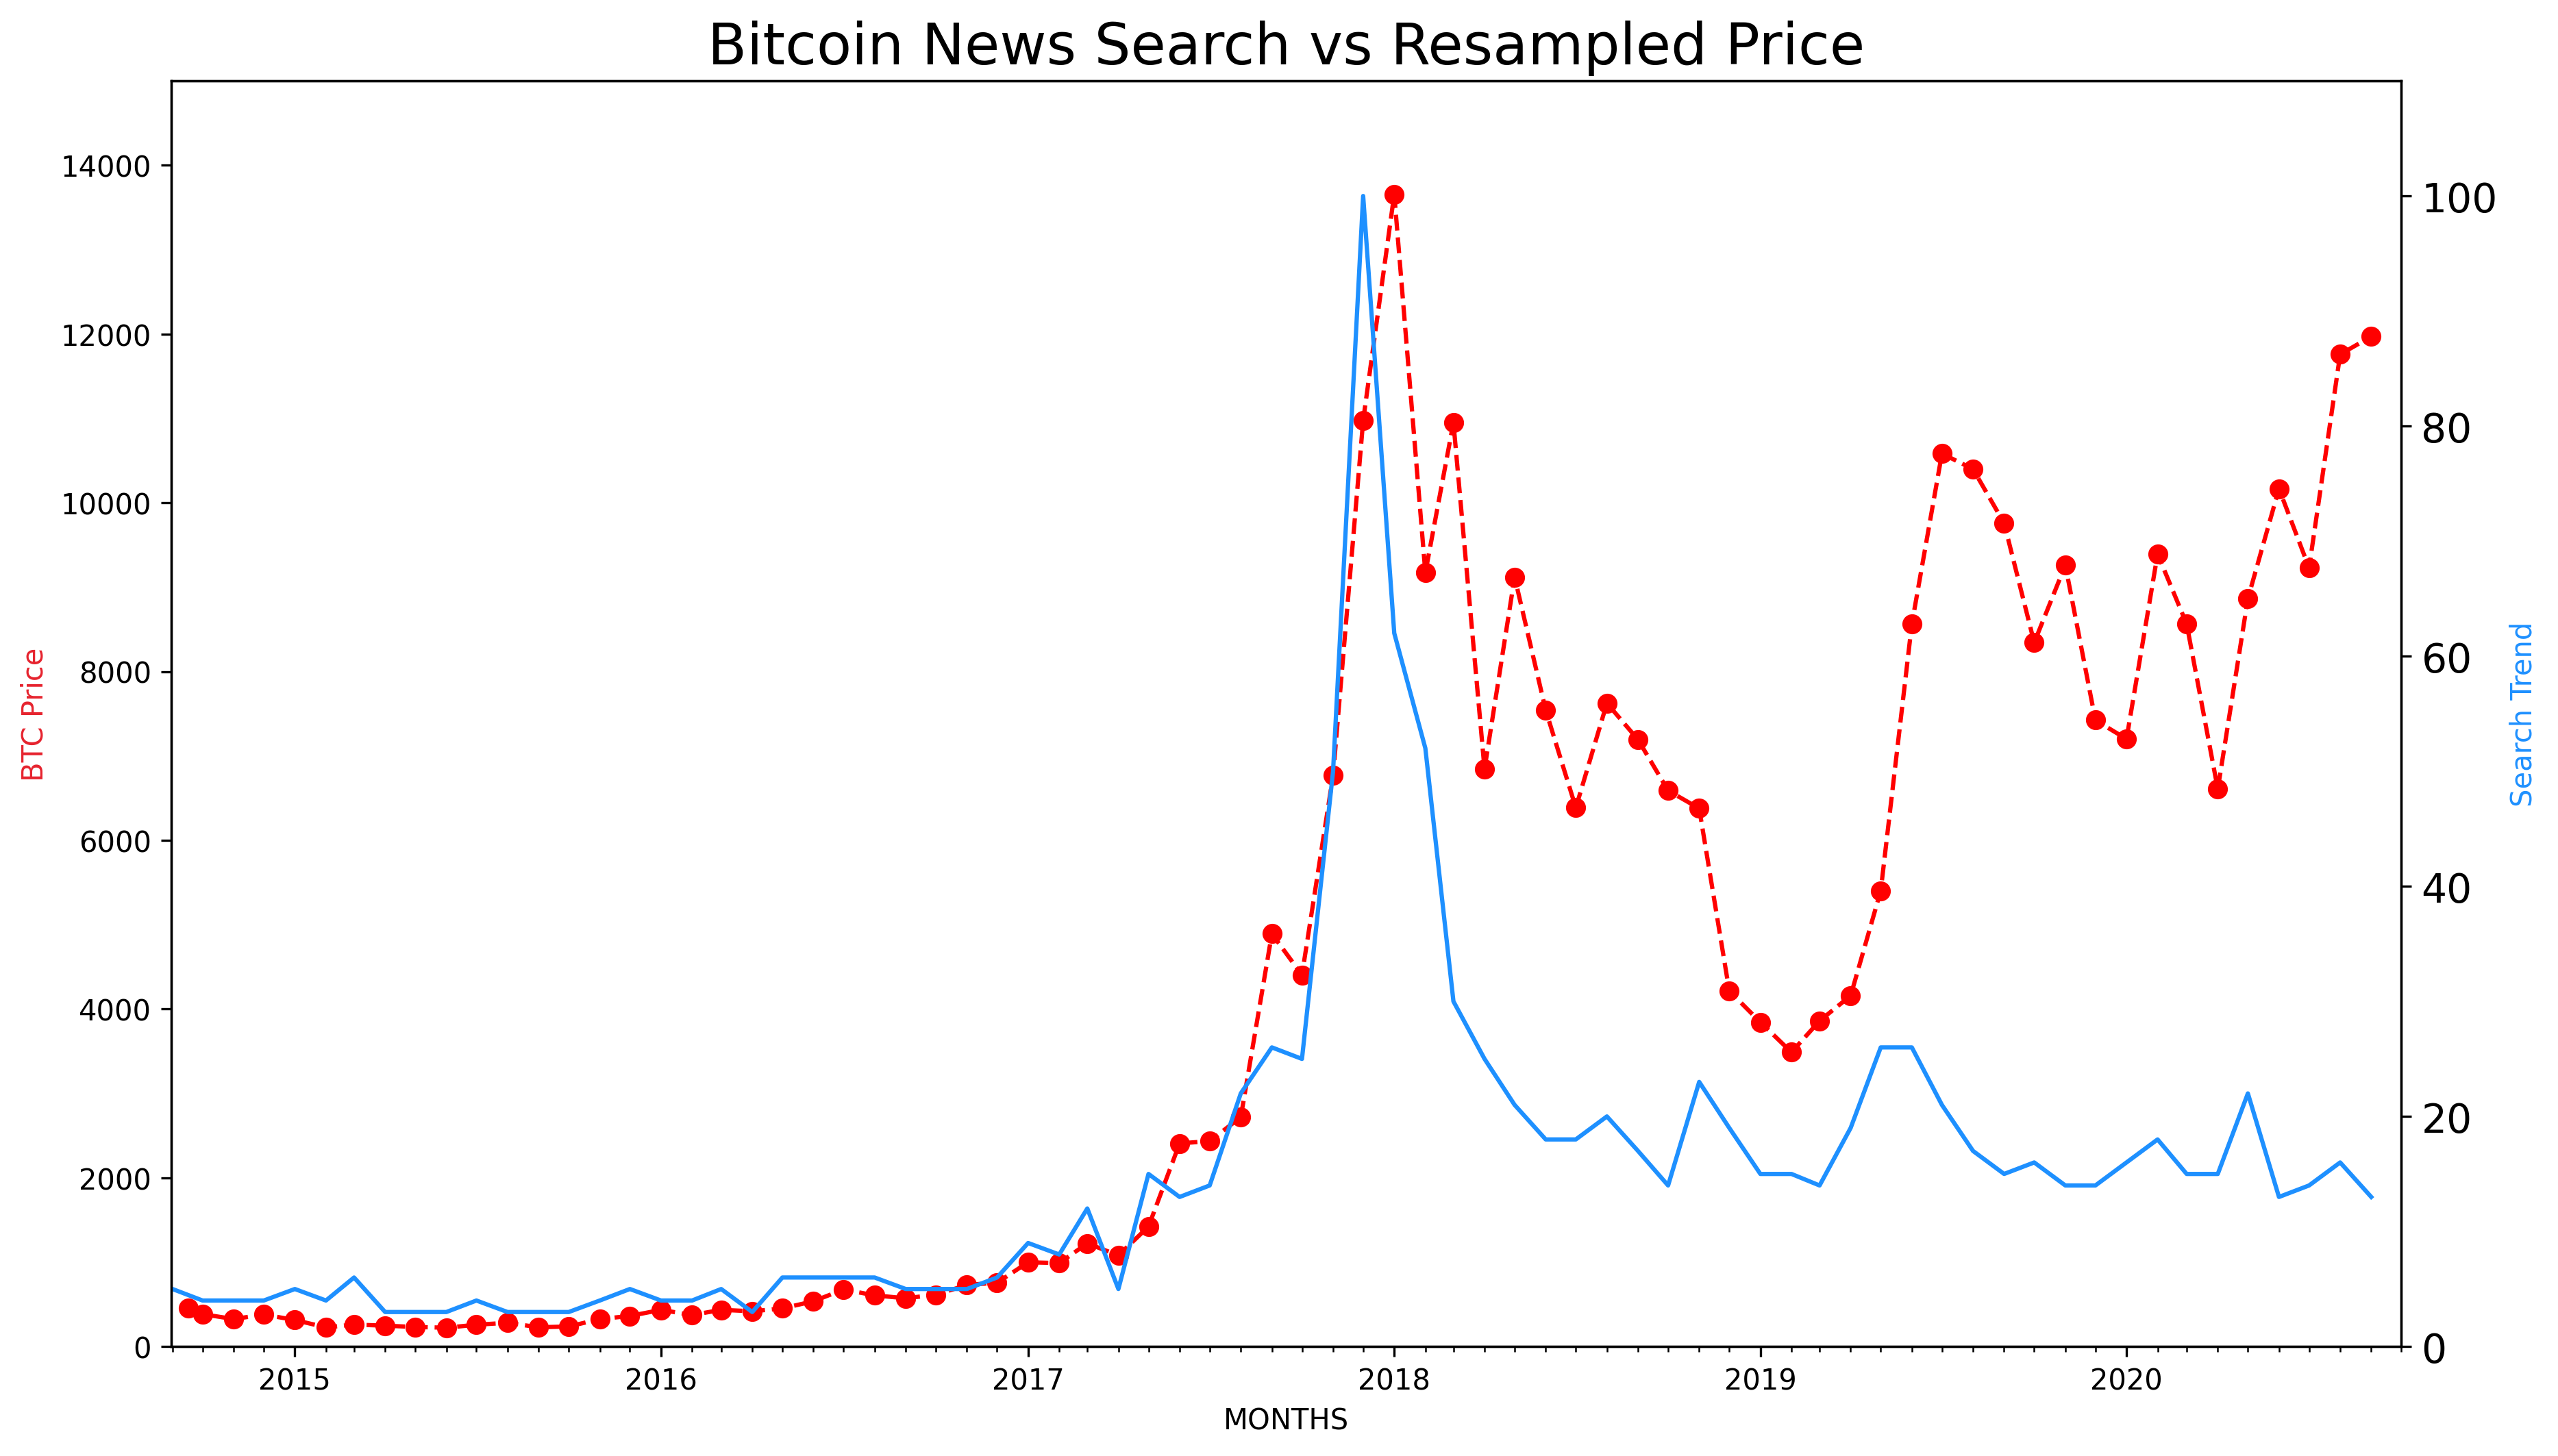

In [ ]:
plt.figure(figsize=(14, 8), dpi=300)
plt.title('Bitcoin News Search vs Resampled Price', fontsize=20)

ax1 = plt.gca()
ax2 = ax1.twinx()

ax1.set_xlabel("MONTHS")
plt.xticks(fontsize=14, rotation=45)
plt.yticks(size=14)

# ticks
ax1.xaxis.set_major_locator(year_locator)
ax1.xaxis.set_major_formatter(date_formatter)
ax1.xaxis.set_minor_locator(month_locator)

ax1.set_xlabel("MONTHS")
plt.xticks(fontsize=14, rotation=45)
plt.yticks(size=14)

ax2.set_ylabel('Search Trend', color='dodgerblue') # can use a HEX code
ax1.set_ylabel('BTC Price', color='#E6232E') # or a named colour


ax1.set_ylim([0, 15000])
ax2.set_ylim([0, 110])
# ax1.set_xlim([df_tesla.MONTH.min(), df_tesla.MONTH.max()])
ax1.set_xlim([pd.to_datetime('2014-08-31'), pd.to_datetime('2020-10-01')])

ax1.plot(df_btc_price['MONTH'], df_btc_price['CLOSE'], color='red', linestyle='--', marker="o")
ax2.plot(df_btc_search['MONTH'], df_btc_search['BTC_NEWS_SEARCH'], color='dodgerblue')

# plt.legend()
print(df_btc_search.describe())
plt.show()

### Unemployement Benefits Search vs. Actual Unemployment in the U.S.

**Challenge** Plot the search for "unemployment benefits" against the unemployment rate.
1. Change the title to: Monthly Search of "Unemployment Benefits" in the U.S. vs the U/E Rate <br>
2. Change the y-axis label to: FRED U/E Rate <br>
3. Change the axis limits <br>
4. Add a grey [grid](https://matplotlib.org/3.2.1/api/_as_gen/matplotlib.pyplot.grid.html) to the chart to better see the years and the U/E rate values. Use dashes for the line style<br>
5. Can you discern any seasonality in the searches? Is there a pattern?

                               MONTH  UE_BENEFITS_WEB_SEARCH  UNRATE
count                            181                 $181.00 $181.00
mean   2011-07-02 01:51:22.872928256                  $35.11   $6.22
min              2004-01-01 00:00:00                  $14.00   $3.70
25%              2007-10-01 00:00:00                  $21.00   $4.70
50%              2011-07-01 00:00:00                  $26.00   $5.40
75%              2015-04-01 00:00:00                  $45.00   $7.80
max              2019-01-01 00:00:00                 $100.00  $10.00
std                              NaN                  $20.48   $1.89


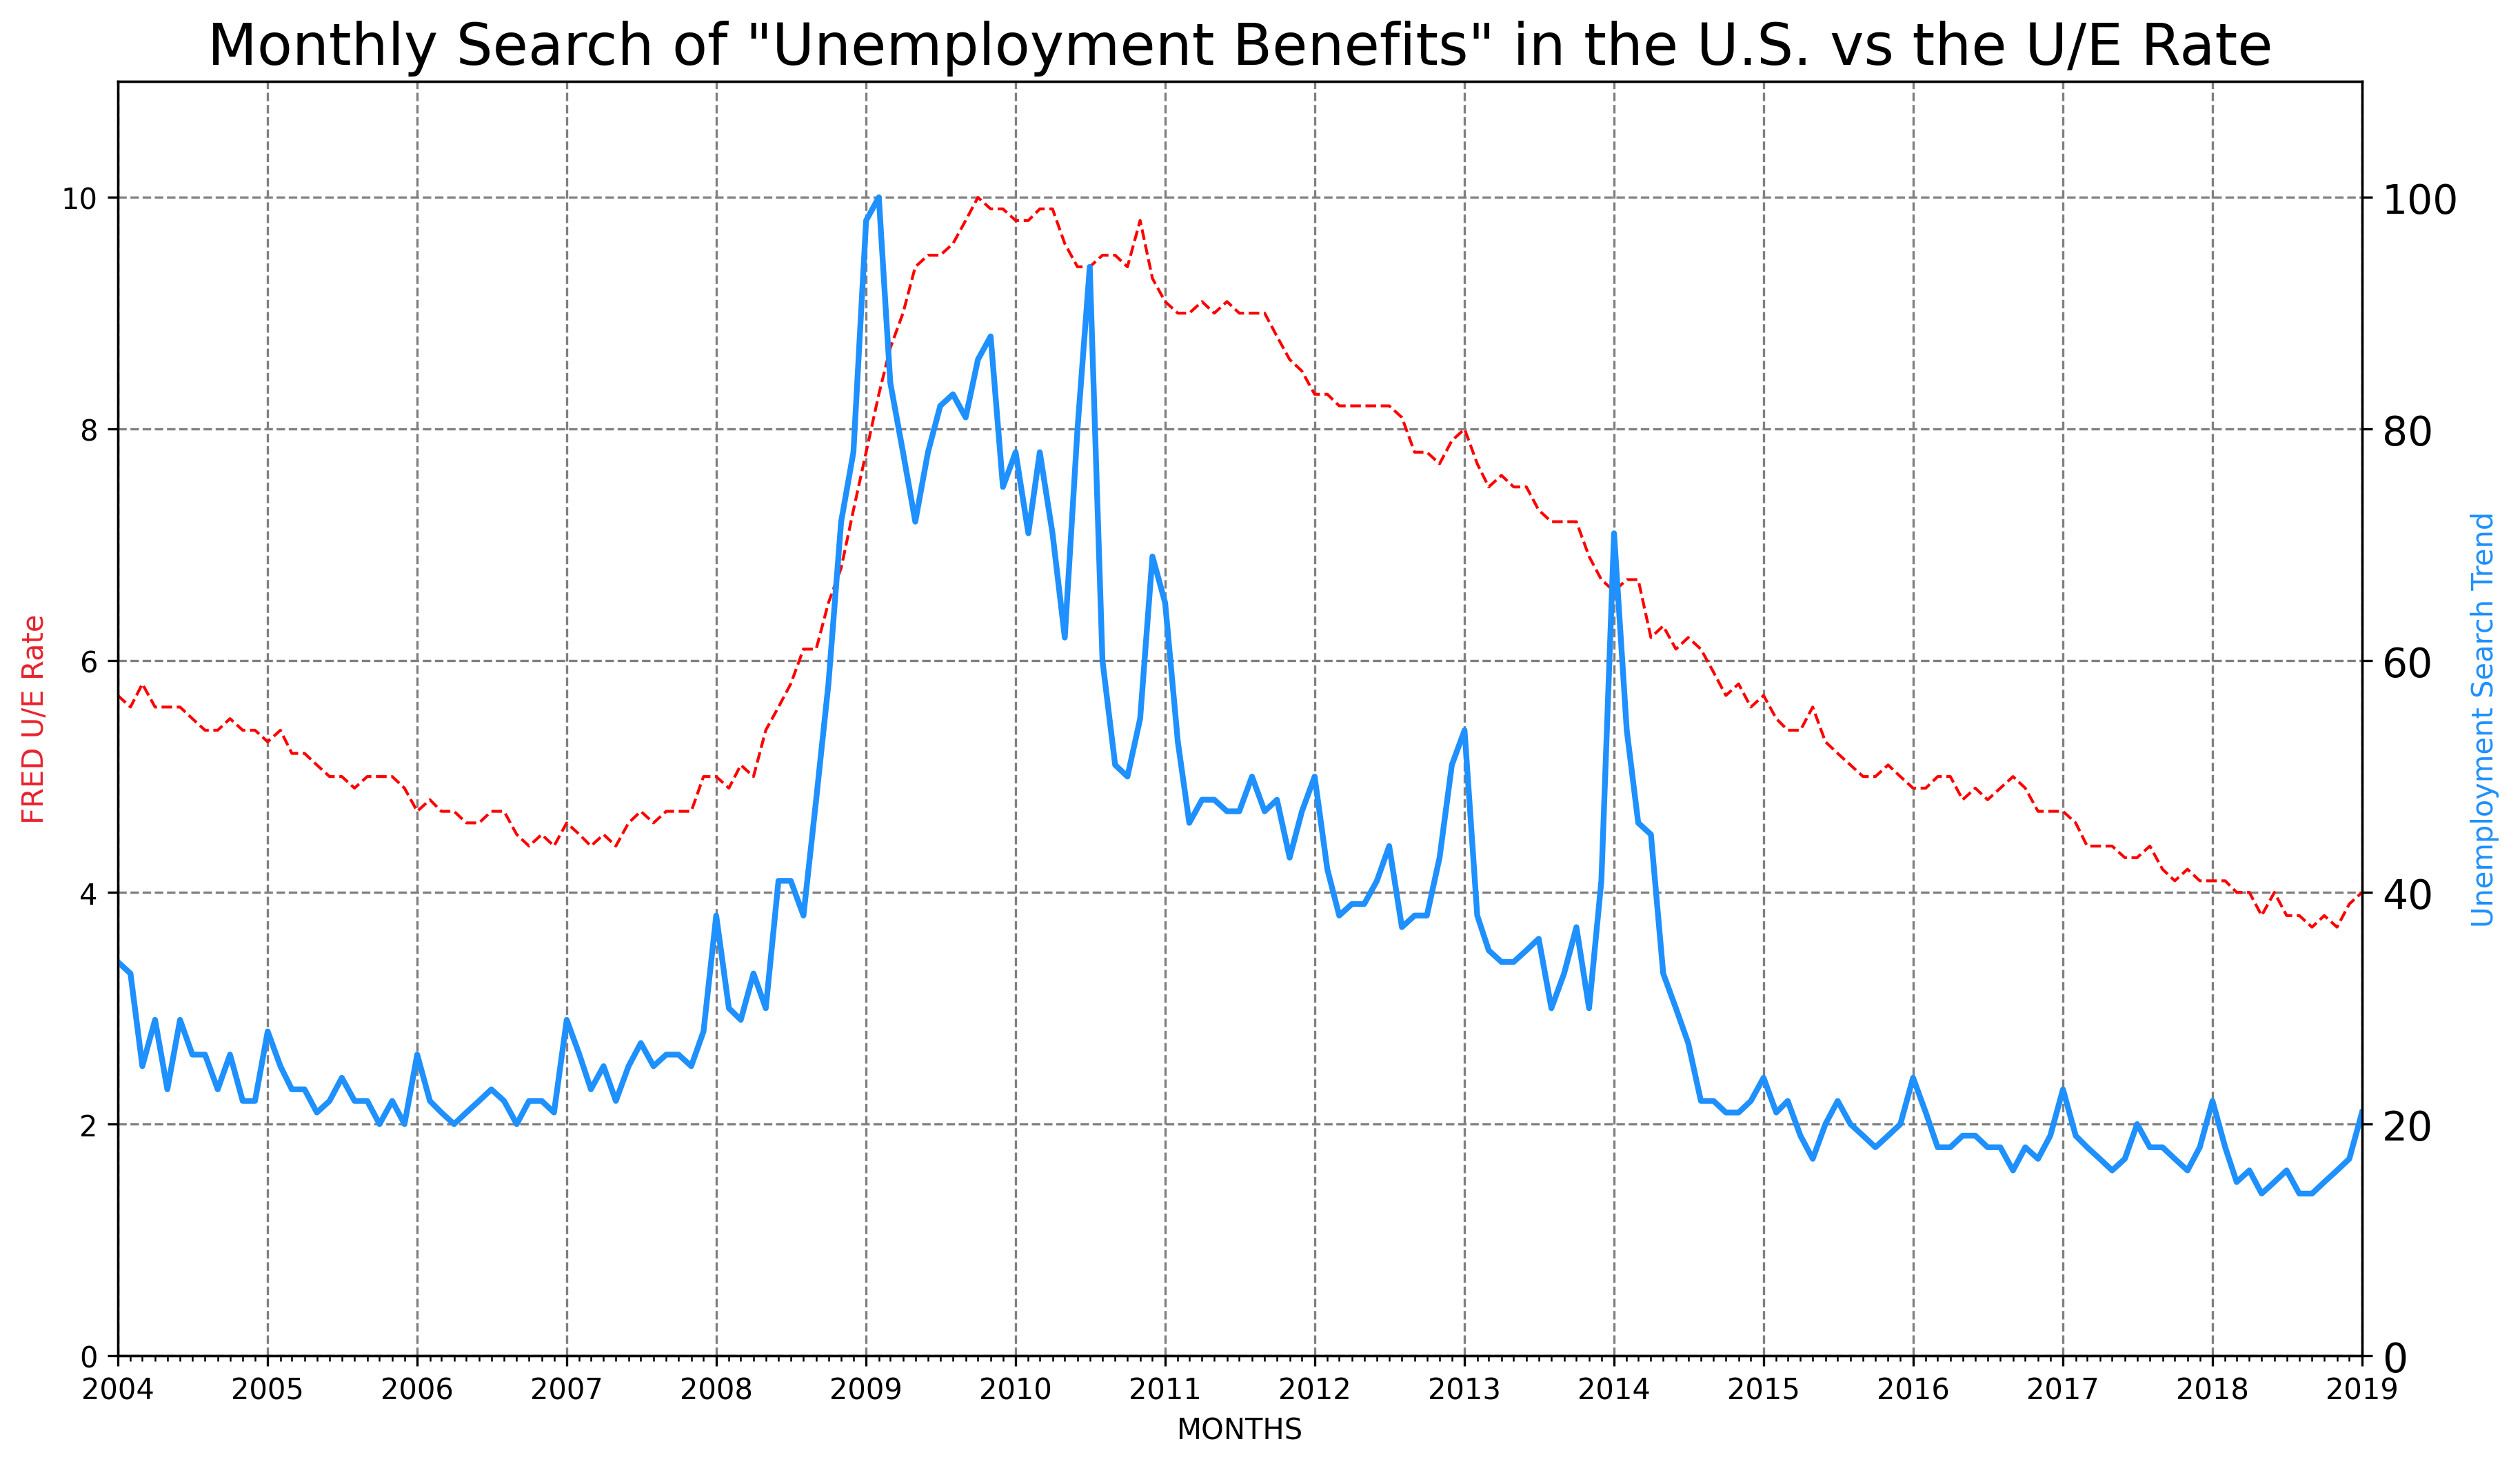

In [ ]:
print(df_unemployment.describe())

plt.figure(figsize=(14, 8), dpi=300)
plt.title('Monthly Search of "Unemployment Benefits" in the U.S. vs the U/E Rate', fontsize=20)
ax1 = plt.gca()
ax2 = ax1.twinx()


# ticks
ax1.xaxis.set_major_locator(year_locator)
ax1.xaxis.set_major_formatter(date_formatter)
ax1.xaxis.set_minor_locator(month_locator)

ax1.set_xlabel("MONTHS")
plt.xticks(fontsize=14, rotation=45)
plt.yticks(size=14)

ax1.set_ylabel('FRED U/E Rate', color='#E6232E') # or a named colour
ax2.set_ylabel('Unemployment Search Trend', color='dodgerblue') # can use a HEX code

# plt.grid(visible=True, color='grey', axis='both')
ax1.grid(color='grey', linestyle='--')

ax1.set_ylim([0, 11])
ax2.set_ylim([0, 110])
ax1.set_xlim([df_unemployment.MONTH.min(), df_unemployment.MONTH.max()])
# ax1.set_xlim([pd.to_datetime('2010-05-01'), pd.to_datetime('2020-10-01')])

ax1.plot(df_unemployment['MONTH'], df_unemployment['UNRATE'], linewidth=1, color='red',
         linestyle='--')
ax2.plot(df_unemployment['MONTH'], df_unemployment['UE_BENEFITS_WEB_SEARCH'], color='dodgerblue', linewidth=2)

# # plt.legend()
plt.show()


**Challenge**: Calculate the 3-month or 6-month rolling average for the web searches. Plot the 6-month rolling average search data against the actual unemployment. What do you see in the chart? Which line moves first?


                               MONTH  UE_BENEFITS_WEB_SEARCH  UNRATE
count                            181                 $181.00 $181.00
mean   2011-07-02 01:51:22.872928256                  $35.11   $6.22
min              2004-01-01 00:00:00                  $14.00   $3.70
25%              2007-10-01 00:00:00                  $21.00   $4.70
50%              2011-07-01 00:00:00                  $26.00   $5.40
75%              2015-04-01 00:00:00                  $45.00   $7.80
max              2019-01-01 00:00:00                 $100.00  $10.00
std                              NaN                  $20.48   $1.89


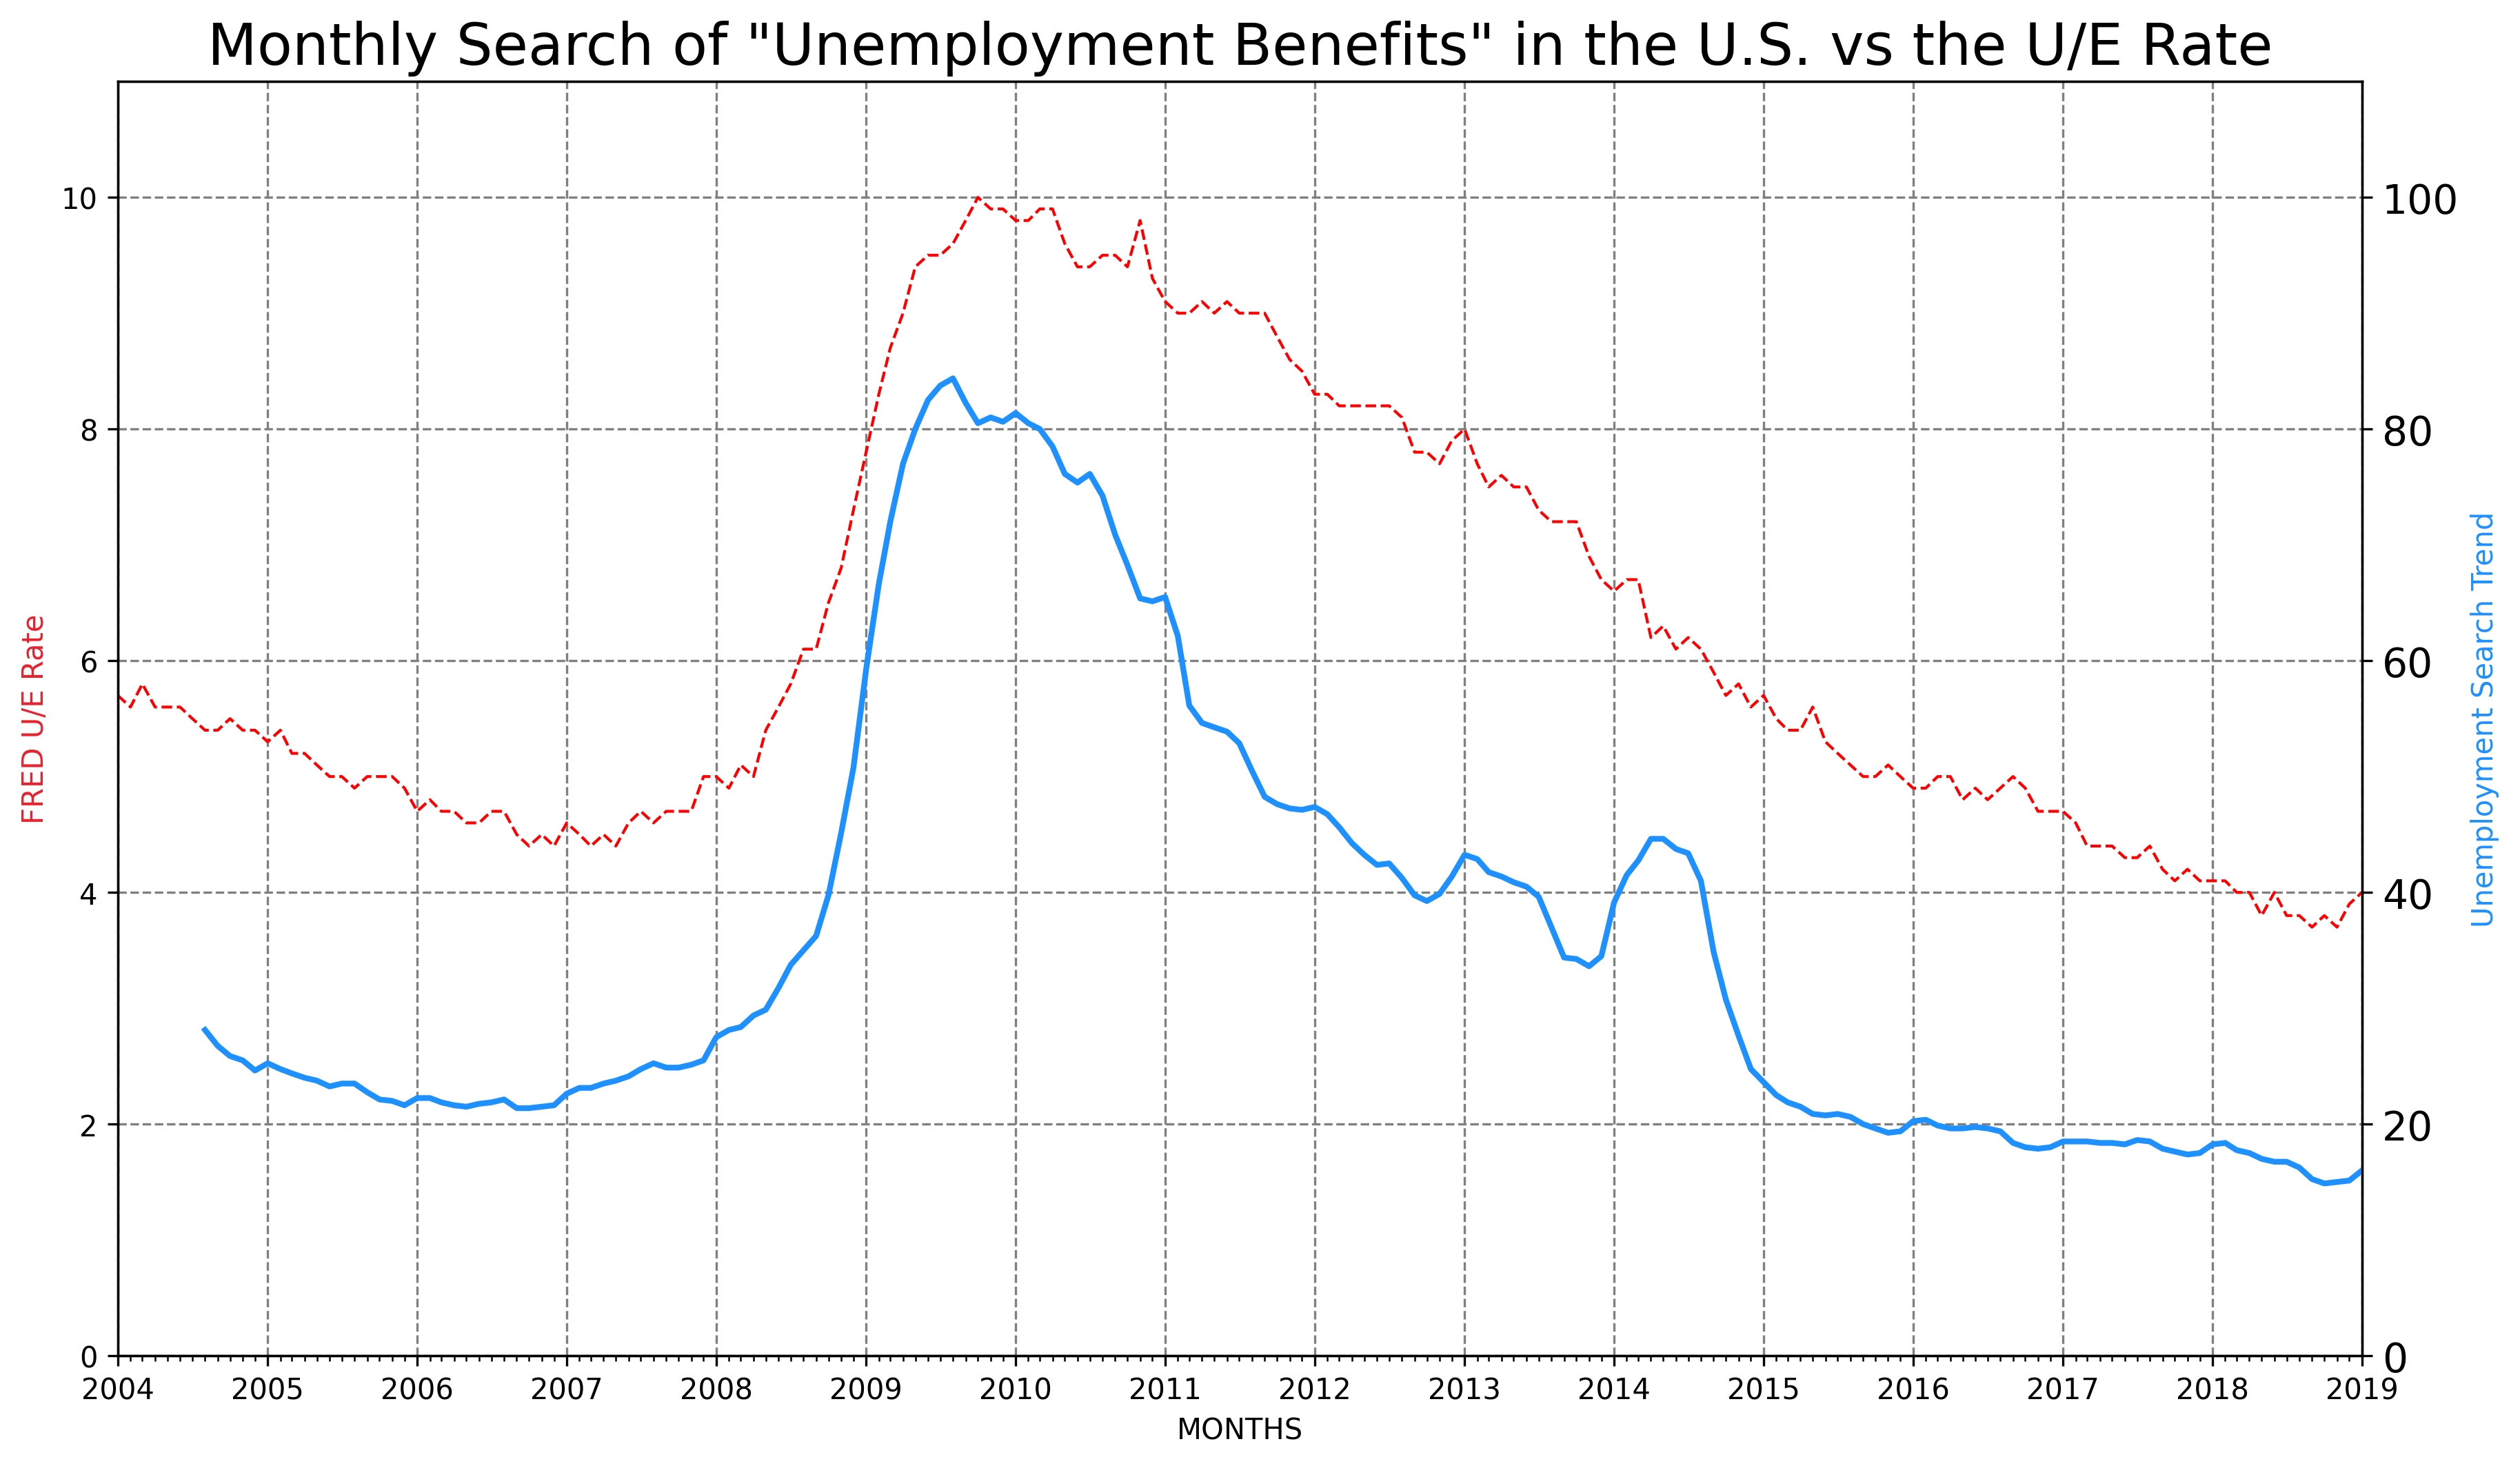

In [ ]:
print(df_unemployment.describe())

plt.figure(figsize=(14, 8), dpi=300)
plt.title('Monthly Search of "Unemployment Benefits" in the U.S. vs the U/E Rate', fontsize=20)
ax1 = plt.gca()
ax2 = ax1.twinx()


# ticks
ax1.xaxis.set_major_locator(year_locator)
ax1.xaxis.set_major_formatter(date_formatter)
ax1.xaxis.set_minor_locator(month_locator)

ax1.set_xlabel("MONTHS")
plt.xticks(fontsize=14, rotation=45)
plt.yticks(size=14)

ax1.set_ylabel('FRED U/E Rate', color='#E6232E') # or a named colour
ax2.set_ylabel('Unemployment Search Trend', color='dodgerblue') # can use a HEX code

# plt.grid(visible=True, color='grey', axis='both')
ax1.grid(color='grey', linestyle='--')

ax1.set_ylim([0, 11])
ax2.set_ylim([0, 110])
ax1.set_xlim([df_unemployment.MONTH.min(), df_unemployment.MONTH.max()])
# ax1.set_xlim([pd.to_datetime('2010-05-01'), pd.to_datetime('2020-10-01')])
roll_df = df_unemployment[['UE_BENEFITS_WEB_SEARCH', 'UNRATE']].rolling(window=8).mean()


ax1.plot(df_unemployment['MONTH'], df_unemployment['UNRATE'], linewidth=1, color='red',
         linestyle='--')
ax2.plot(df_unemployment['MONTH'], roll_df['UE_BENEFITS_WEB_SEARCH'], color='dodgerblue', linewidth=2)

# # plt.legend()
plt.show()


### Including 2020 in Unemployment Charts

**Challenge**: Read the data in the 'UE Benefits Search vs UE Rate 2004-20.csv' into a DataFrame. Convert the MONTH column to Pandas Datetime objects and then plot the chart. What do you see?

In [ ]:

print(df_unemployment.shape)
print(df_unemployment.describe())
roll_df = df_unemployment[['UE_BENEFITS_WEB_SEARCH', 'UNRATE']].rolling(window=6).mean()
print(roll_df.describe())
print(roll_df.head())

(181, 3)
                               MONTH  UE_BENEFITS_WEB_SEARCH  UNRATE
count                            181                 $181.00 $181.00
mean   2011-07-02 01:51:22.872928256                  $35.11   $6.22
min              2004-01-01 00:00:00                  $14.00   $3.70
25%              2007-10-01 00:00:00                  $21.00   $4.70
50%              2011-07-01 00:00:00                  $26.00   $5.40
75%              2015-04-01 00:00:00                  $45.00   $7.80
max              2019-01-01 00:00:00                 $100.00  $10.00
std                              NaN                  $20.48   $1.89
       UE_BENEFITS_WEB_SEARCH  UNRATE
count                 $176.00 $176.00
mean                   $35.42   $6.26
std                    $19.81   $1.89
min                    $14.67   $3.78
25%                    $20.75   $4.78
50%                    $25.58   $5.47
75%                    $45.04   $7.93
max                    $85.00   $9.88
   UE_BENEFITS_WEB_SEARCH  U

In [ ]:
roll_df['UNRATE']

,UNRATE
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
...,...
176,$3.85
177,$3.82
178,$3.80
179,$3.78


In [ ]:
df_unemployment_20 = pd.read_csv('/content/UE Benefits Search vs UE Rate 2004-20.csv')
df_unemployment_20['MONTH'] = pd.to_datetime(df_unemployment_20['MONTH'], format='ISO8601')
df_unemployment_20.head()

,MONTH,UE_BENEFITS_WEB_SEARCH,UNRATE
0,2004-01-01,9,$5.70
1,2004-02-01,8,$5.60
2,2004-03-01,7,$5.80
3,2004-04-01,8,$5.60
4,2004-05-01,6,$5.60


                               MONTH  UE_BENEFITS_WEB_SEARCH  UNRATE
count                            181                 $181.00 $181.00
mean   2011-07-02 01:51:22.872928256                  $35.11   $6.22
min              2004-01-01 00:00:00                  $14.00   $3.70
25%              2007-10-01 00:00:00                  $21.00   $4.70
50%              2011-07-01 00:00:00                  $26.00   $5.40
75%              2015-04-01 00:00:00                  $45.00   $7.80
max              2019-01-01 00:00:00                 $100.00  $10.00
std                              NaN                  $20.48   $1.89


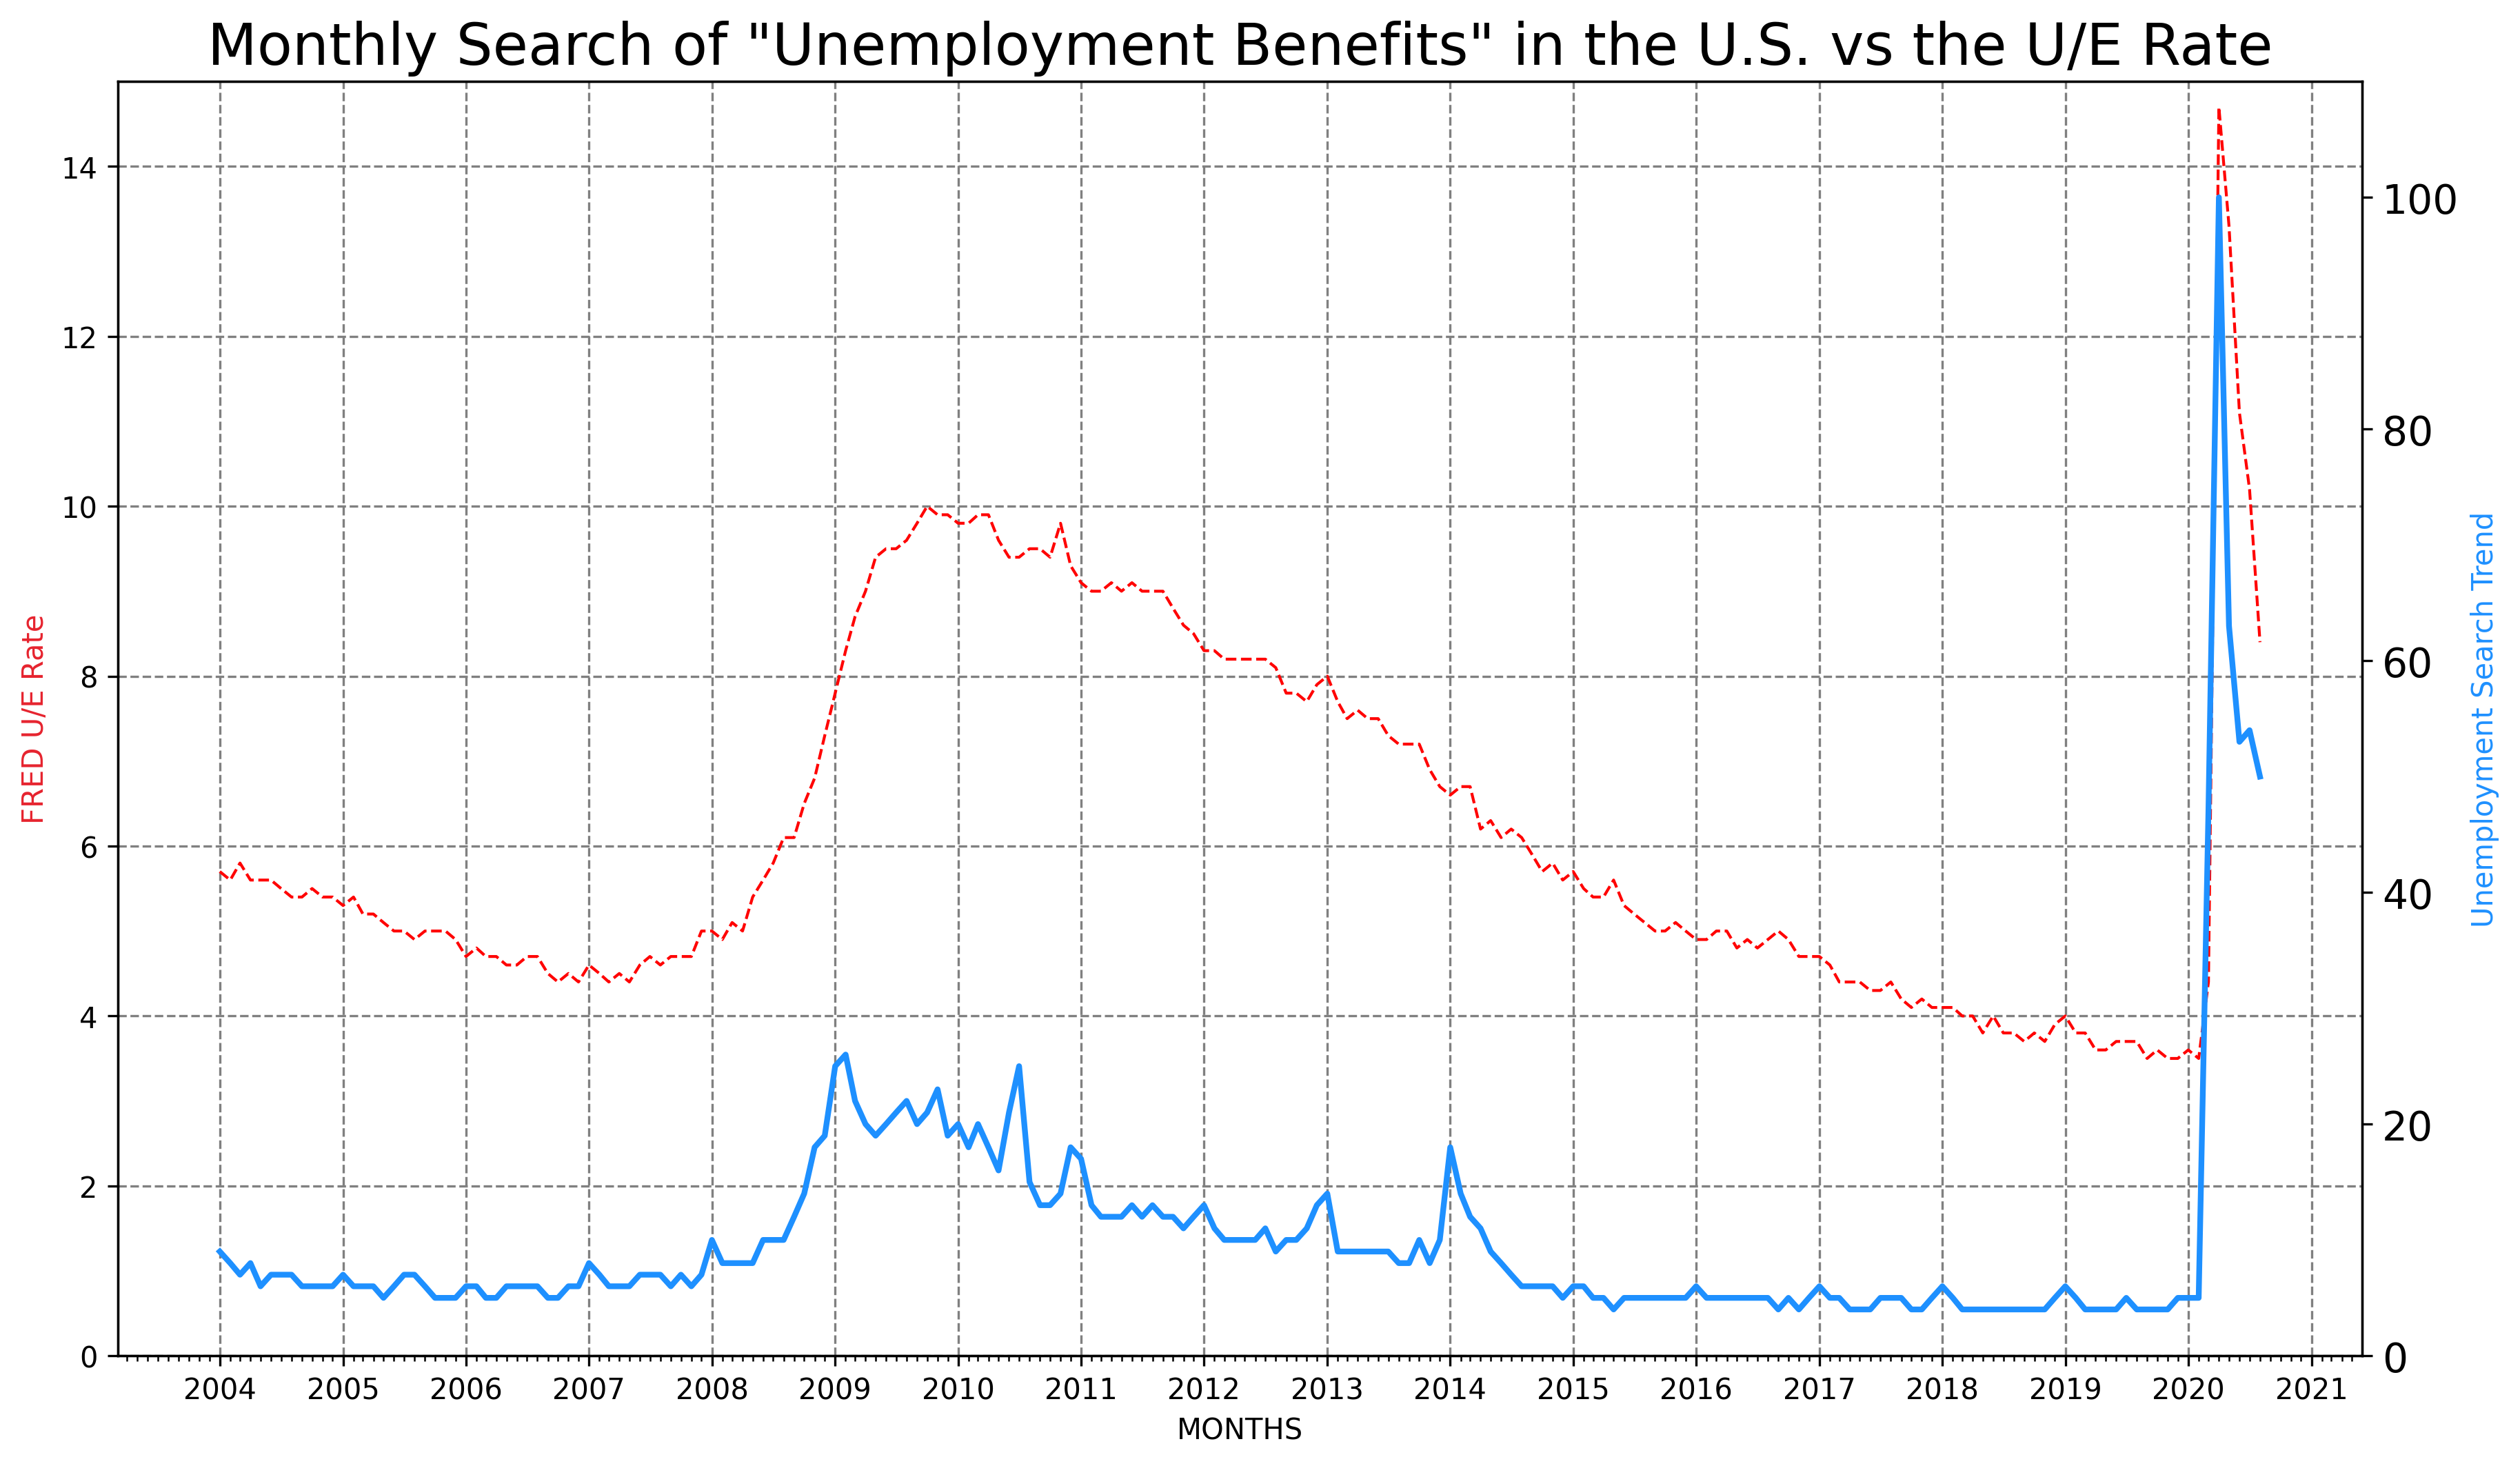

In [ ]:
print(df_unemployment.describe())

plt.figure(figsize=(14, 8), dpi=300)
plt.title('Monthly Search of "Unemployment Benefits" in the U.S. vs the U/E Rate', fontsize=20)
ax1 = plt.gca()
ax2 = ax1.twinx()


# ticks
ax1.xaxis.set_major_locator(year_locator)
ax1.xaxis.set_major_formatter(date_formatter)
ax1.xaxis.set_minor_locator(month_locator)

ax1.set_xlabel("MONTHS")
plt.xticks(fontsize=14, rotation=45)
plt.yticks(size=14)

ax1.set_ylabel('FRED U/E Rate', color='#E6232E') # or a named colour
ax2.set_ylabel('Unemployment Search Trend', color='dodgerblue') # can use a HEX code

# plt.grid(visible=True, color='grey', axis='both')
ax1.grid(color='grey', linestyle='--')

ax1.set_ylim([0, 15])
ax2.set_ylim([0, 110])
# ax1.set_xlim([df_unemployment_20.MONTH.min(), df_unemployment_20.MONTH.max()])
# ax1.set_xlim([pd.to_datetime('2010-05-01'), pd.to_datetime('2020-10-01')])
# roll_df = df_unemployment[['UE_BENEFITS_WEB_SEARCH', 'UNRATE']].rolling(window=8).mean()


ax1.plot(df_unemployment_20['MONTH'], df_unemployment_20['UNRATE'], linewidth=1, color='red',
         linestyle='--')
ax2.plot(df_unemployment_20['MONTH'], df_unemployment_20['UE_BENEFITS_WEB_SEARCH'], color='dodgerblue', linewidth=2)

# # plt.legend()
plt.show()
